In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error


set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [2]:
houses_df = pd.read_csv('train.csv')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses_df.drop(['Id', 'SalePrice'], axis=1))
categorical_columns = categorical_columns_selector(houses_df)

print(numerical_columns)
print(categorical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

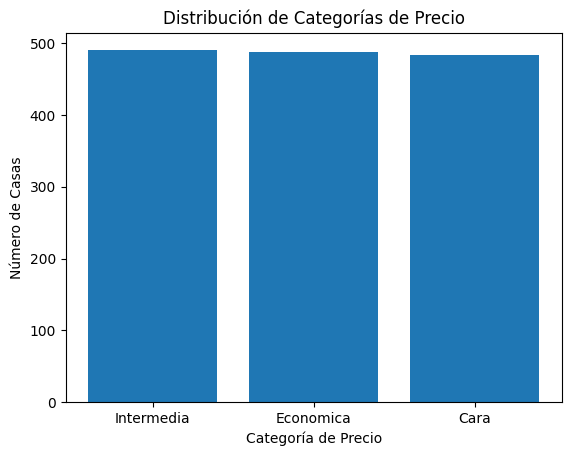

In [4]:
# Define the number of categories
num_categories = 3

# Define the category names
category_names = ['Economica', 'Intermedia', 'Cara']

# Create a new column in the DataFrame for the categories
houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)

# Verificar la distribución de las categorías
plt.bar(houses_df['Precio_Categoria'].value_counts().index, houses_df['Precio_Categoria'].value_counts().values)
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Casas')
plt.title('Distribución de Categorías de Precio')
plt.show()

In [5]:
preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [6]:
preprocesador = ColumnTransformer([
    ('Variables Categóricas',preprocesador_categorico, categorical_columns),
    ('Variables Numéricas',preprocesador_numerico, numerical_columns)
], remainder="passthrough")

In [7]:
modelo = make_pipeline(preprocesador,MLPClassifier(activation="relu",verbose=True,hidden_layer_sizes=(30, 20),max_iter=500))
modelo

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'E...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=500,
                               verbose=True))])

In [8]:
target = houses_df.pop('Precio_Categoria')
data = houses_df.drop(['Id', 'SalePrice'], axis=1)

In [9]:
random.seed(123)
data_train, data_test, target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [10]:
modelo.fit(data_train,target_train)

Iteration 1, loss = 1.07981632
Iteration 2, loss = 0.91960346
Iteration 3, loss = 0.79640087
Iteration 4, loss = 0.69651808
Iteration 5, loss = 0.61845302
Iteration 6, loss = 0.55455327
Iteration 7, loss = 0.50310510
Iteration 8, loss = 0.46299990
Iteration 9, loss = 0.43286931
Iteration 10, loss = 0.40863566
Iteration 11, loss = 0.39130948
Iteration 12, loss = 0.37536414
Iteration 13, loss = 0.36301963
Iteration 14, loss = 0.34872180
Iteration 15, loss = 0.33615918
Iteration 16, loss = 0.32545948
Iteration 17, loss = 0.31517918
Iteration 18, loss = 0.30599923
Iteration 19, loss = 0.29776498
Iteration 20, loss = 0.29037233
Iteration 21, loss = 0.28254462
Iteration 22, loss = 0.27677343
Iteration 23, loss = 0.26633811
Iteration 24, loss = 0.25918825
Iteration 25, loss = 0.26052806
Iteration 26, loss = 0.24814003
Iteration 27, loss = 0.24386806
Iteration 28, loss = 0.23332306
Iteration 29, loss = 0.23368380
Iteration 30, loss = 0.22203855
Iteration 31, loss = 0.22309139
Iteration 32, los

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'E...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=500,
                               verbose=True))])

In [11]:
pred = modelo.predict(data_test)

In [12]:
cm = confusion_matrix(target_test,pred)
accuracy=accuracy_score(target_test,pred)
precision =precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[136   0  18]
 [  1 127  13]
 [ 14  24 105]]
Accuracy:  0.8401826484018264
Precision:  0.8401826484018264
recall:  0.8401826484018264


In [13]:
modelo1 = make_pipeline(preprocesador,MLPClassifier(activation="identity",verbose=True,hidden_layer_sizes=(), max_iter=300))

modelo1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'E...
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(),
                               max_iter=300, verbose=True))])

In [14]:
modelo1.fit(data_train,target_train)

Iteration 1, loss = 1.38358049
Iteration 2, loss = 1.20794499
Iteration 3, loss = 1.07661262
Iteration 4, loss = 0.98180954
Iteration 5, loss = 0.91669351
Iteration 6, loss = 0.86489883
Iteration 7, loss = 0.82303187
Iteration 8, loss = 0.78486231
Iteration 9, loss = 0.75261125
Iteration 10, loss = 0.72501346
Iteration 11, loss = 0.70167159
Iteration 12, loss = 0.68091431
Iteration 13, loss = 0.66275773
Iteration 14, loss = 0.64739544
Iteration 15, loss = 0.63276349
Iteration 16, loss = 0.61940818
Iteration 17, loss = 0.60678292
Iteration 18, loss = 0.59588108
Iteration 19, loss = 0.58526996
Iteration 20, loss = 0.57560870
Iteration 21, loss = 0.56590766
Iteration 22, loss = 0.55764571
Iteration 23, loss = 0.54977946
Iteration 24, loss = 0.54209890
Iteration 25, loss = 0.53484899
Iteration 26, loss = 0.52801122
Iteration 27, loss = 0.52172465
Iteration 28, loss = 0.51602859
Iteration 29, loss = 0.51080394
Iteration 30, loss = 0.50494098
Iteration 31, loss = 0.49914025
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'E...
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(),
                               max_iter=300, verbose=True))])

In [15]:
pred1 = modelo1.predict(data_test)

In [16]:
cm = confusion_matrix(target_test,pred1)
accuracy=accuracy_score(target_test,pred1)
precision =precision_score(target_test,pred1,average='micro')
recall =  recall_score(target_test,pred1,average='micro')
f1 = f1_score(target_test,pred1,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[137   0  17]
 [  1 131   9]
 [ 16  26 101]]
Accuracy:  0.8424657534246576
Precision:  0.8424657534246576
recall:  0.8424657534246576


In [17]:
parametros_tun  = param_grid = {
    'mlpclassifier__max_iter': (100,200,500,1000),
    'mlpclassifier__learning_rate_init': (0.01, 0.001, 1,10),
    'mlpclassifier__hidden_layer_sizes':((30,20),(50,30),(10,20))}
model_grid_search = GridSearchCV(modelo1, param_grid=parametros_tun,
                                 n_jobs=2, cv=10) #Vamos a usar dos procesadores(n_jobs), y 10 k-folds
model_grid_search.fit(data_train, target_train)

Iteration 1, loss = 0.79400782
Iteration 2, loss = 0.42592944
Iteration 3, loss = 0.38034711
Iteration 4, loss = 0.36467983
Iteration 5, loss = 0.32799651
Iteration 6, loss = 0.30163170
Iteration 7, loss = 0.27507806
Iteration 8, loss = 0.26959087
Iteration 9, loss = 0.24009409
Iteration 10, loss = 0.22263661
Iteration 11, loss = 0.20728146
Iteration 12, loss = 0.19871478
Iteration 13, loss = 0.18572094
Iteration 14, loss = 0.18352131
Iteration 15, loss = 0.17436275
Iteration 1, loss = 1.01542284
Iteration 16, loss = 0.16424657
Iteration 2, loss = 0.55686466
Iteration 17, loss = 0.15450167
Iteration 3, loss = 0.43612424
Iteration 18, loss = 0.17105437
Iteration 4, loss = 0.37140253
Iteration 19, loss = 0.16379573
Iteration 5, loss = 0.34158265
Iteration 20, loss = 0.14188118
Iteration 6, loss = 0.30916089
Iteration 21, loss = 0.15709427
Iteration 7, loss = 0.28171222
Iteration 22, loss = 0.14096867
Iteration 8, loss = 0.26707119
Iteration 23, loss = 0.14475308
Iteration 9, loss = 0.251

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 72, loss = 0.14652263
Iteration 47, loss = 0.20248725
Iteration 73, loss = 0.14238919
Iteration 48, loss = 0.20113892
Iteration 74, loss = 0.13989568
Iteration 49, loss = 0.19996577
Iteration 75, loss = 0.14127845
Iteration 50, loss = 0.19521309
Iteration 76, loss = 0.14040254
Iteration 51, loss = 0.19616157
Iteration 77, loss = 0.13521840
Iteration 52, loss = 0.19048946
Iteration 78, loss = 0.13702346
Iteration 53, loss = 0.18929721
Iteration 79, loss = 0.13476373
Iteration 54, loss = 0.18818009
Iteration 80, loss = 0.13349276
Iteration 55, loss = 0.18337904
Iteration 81, loss = 0.12651028
Iteration 56, loss = 0.18365106
Iteration 82, loss = 0.13727951
Iteration 57, loss = 0.17825573
Iteration 83, loss = 0.12928347
Iteration 58, loss = 0.17850787
Iteration 84, loss = 0.12811950
Iteration 59, loss = 0.17455806
Iteration 85, loss = 0.12633375
Iteration 60, loss = 0.17450095
Iteration 86, loss = 0.12277028
Iteration 61, loss = 0.17416057
Iteration 87, loss = 0.12162888
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 0.31633208
Iteration 48, loss = 0.20823457
Iteration 22, loss = 0.31156722
Iteration 49, loss = 0.20885776
Iteration 23, loss = 0.30408311
Iteration 50, loss = 0.20450578
Iteration 51, loss = 0.20274380
Iteration 24, loss = 0.29739822
Iteration 52, loss = 0.20339769
Iteration 25, loss = 0.29162041
Iteration 53, loss = 0.19709852
Iteration 26, loss = 0.28698051
Iteration 54, loss = 0.19486090
Iteration 27, loss = 0.28120236
Iteration 55, loss = 0.19435856
Iteration 28, loss = 0.27614954
Iteration 56, loss = 0.18845264
Iteration 29, loss = 0.27348927
Iteration 57, loss = 0.18637890
Iteration 30, loss = 0.26694282
Iteration 58, loss = 0.18584462
Iteration 31, loss = 0.26336009
Iteration 59, loss = 0.18685348
Iteration 32, loss = 0.25915713
Iteration 60, loss = 0.18052615
Iteration 33, loss = 0.25571421
Iteration 61, loss = 0.17821341
Iteration 34, loss = 0.25006914
Iteration 62, loss = 0.17686945
Iteration 35, loss = 0.24649119
Iteration 63, loss = 0.17313166
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 0.29163847
Iteration 23, loss = 0.28562176
Iteration 24, loss = 0.28104473
Iteration 25, loss = 0.27797967
Iteration 26, loss = 0.27240839
Iteration 27, loss = 0.26690187
Iteration 28, loss = 0.26258618
Iteration 1, loss = 1.24141554
Iteration 29, loss = 0.25914553
Iteration 2, loss = 0.86502452
Iteration 30, loss = 0.25566954
Iteration 3, loss = 0.69173785
Iteration 31, loss = 0.25248845
Iteration 32, loss = 0.24724952
Iteration 4, loss = 0.59047670
Iteration 5, loss = 0.53129137
Iteration 33, loss = 0.24507648
Iteration 6, loss = 0.48706933
Iteration 34, loss = 0.24038353
Iteration 7, loss = 0.45132860
Iteration 35, loss = 0.23569925
Iteration 8, loss = 0.42924769
Iteration 36, loss = 0.23325184
Iteration 9, loss = 0.40747186
Iteration 37, loss = 0.22910473
Iteration 10, loss = 0.38955385
Iteration 38, loss = 0.22661897
Iteration 11, loss = 0.37452404
Iteration 39, loss = 0.22344322
Iteration 12, loss = 0.36168992
Iteration 40, loss = 0.22138260
Iteration 13, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 82, loss = 0.10624183
Iteration 83, loss = 0.10296776
Iteration 84, loss = 0.10206631
Iteration 1, loss = 1.26815900
Iteration 85, loss = 0.10125912
Iteration 2, loss = 0.89154097
Iteration 86, loss = 0.09773610
Iteration 3, loss = 0.72208612
Iteration 87, loss = 0.09716914
Iteration 4, loss = 0.60206885
Iteration 88, loss = 0.09508818
Iteration 5, loss = 0.53921376
Iteration 89, loss = 0.09456814
Iteration 6, loss = 0.49203852
Iteration 90, loss = 0.09347925
Iteration 7, loss = 0.45748563
Iteration 91, loss = 0.09071075
Iteration 8, loss = 0.43233521
Iteration 92, loss = 0.08979348
Iteration 9, loss = 0.40949641
Iteration 93, loss = 0.08848335
Iteration 10, loss = 0.39272826
Iteration 94, loss = 0.08765150
Iteration 11, loss = 0.37742350
Iteration 95, loss = 0.08635988
Iteration 12, loss = 0.36345233
Iteration 96, loss = 0.08749392
Iteration 13, loss = 0.35110013
Iteration 97, loss = 0.08570046
Iteration 14, loss = 0.34082915
Iteration 98, loss = 0.08348410
Iteration 15, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 0.23633864
Iteration 61, loss = 0.18547134
Iteration 33, loss = 0.23422217
Iteration 62, loss = 0.18341762
Iteration 34, loss = 0.22932754
Iteration 63, loss = 0.18144311
Iteration 64, loss = 0.17871887
Iteration 35, loss = 0.22758085
Iteration 36, loss = 0.22286621
Iteration 65, loss = 0.17610611
Iteration 37, loss = 0.21913915
Iteration 66, loss = 0.17408454
Iteration 38, loss = 0.21589646
Iteration 67, loss = 0.17062708
Iteration 39, loss = 0.21310185
Iteration 68, loss = 0.16889225
Iteration 40, loss = 0.21078244
Iteration 69, loss = 0.16691254
Iteration 41, loss = 0.20694695
Iteration 70, loss = 0.16509917
Iteration 42, loss = 0.20420719
Iteration 71, loss = 0.16371981
Iteration 43, loss = 0.20245652
Iteration 72, loss = 0.16238207
Iteration 44, loss = 0.19858148
Iteration 73, loss = 0.15984749
Iteration 45, loss = 0.19573066
Iteration 74, loss = 0.15939446
Iteration 46, loss = 0.19313120
Iteration 75, loss = 0.15648611
Iteration 47, loss = 0.19200893
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 24, loss = 0.27298152
Iteration 25, loss = 0.26923537
Iteration 26, loss = 0.26505781
Iteration 27, loss = 0.25802442
Iteration 28, loss = 0.25367036
Iteration 29, loss = 0.24865602
Iteration 30, loss = 0.24492899
Iteration 31, loss = 0.23975401
Iteration 1, loss = 1.57538633
Iteration 32, loss = 0.23602194
Iteration 2, loss = 0.92422217
Iteration 33, loss = 0.23257742
Iteration 3, loss = 0.80676255
Iteration 34, loss = 0.23095481
Iteration 4, loss = 0.71151961
Iteration 35, loss = 0.22597673
Iteration 5, loss = 0.61800526
Iteration 36, loss = 0.22276934
Iteration 6, loss = 0.56850286
Iteration 37, loss = 0.21707160
Iteration 7, loss = 0.53805076
Iteration 38, loss = 0.21377818
Iteration 8, loss = 0.50810936
Iteration 39, loss = 0.21175095
Iteration 9, loss = 0.48235176
Iteration 40, loss = 0.20793507
Iteration 10, loss = 0.46322569
Iteration 41, loss = 0.20466548
Iteration 11, loss = 0.44733620
Iteration 42, loss = 0.20394986
Iteration 12, loss = 0.43193606
Iteration 43, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 76, loss = 0.15424451
Iteration 45, loss = 0.21423440
Iteration 77, loss = 0.15028323
Iteration 46, loss = 0.20887666
Iteration 78, loss = 0.14784796
Iteration 47, loss = 0.21159355
Iteration 79, loss = 0.14646429
Iteration 48, loss = 0.20348177
Iteration 80, loss = 0.14398184
Iteration 49, loss = 0.20466790
Iteration 81, loss = 0.14450301
Iteration 50, loss = 0.19844151
Iteration 82, loss = 0.14356234
Iteration 51, loss = 0.19872769
Iteration 83, loss = 0.14250945
Iteration 52, loss = 0.19260242
Iteration 84, loss = 0.13976887
Iteration 53, loss = 0.19191134
Iteration 85, loss = 0.14103960
Iteration 54, loss = 0.18841224
Iteration 86, loss = 0.13591570
Iteration 55, loss = 0.18894941
Iteration 87, loss = 0.13446227
Iteration 56, loss = 0.18413144
Iteration 88, loss = 0.13256774
Iteration 57, loss = 0.18271450
Iteration 89, loss = 0.13056644
Iteration 58, loss = 0.17944519
Iteration 90, loss = 0.12997971
Iteration 59, loss = 0.17876710
Iteration 91, loss = 0.12907553
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.47083924
Iteration 41, loss = 0.23833191
Iteration 8, loss = 0.44701649
Iteration 42, loss = 0.23448530
Iteration 9, loss = 0.42615719
Iteration 43, loss = 0.23247530
Iteration 10, loss = 0.40920829
Iteration 44, loss = 0.22815216
Iteration 11, loss = 0.39533463
Iteration 45, loss = 0.22591155
Iteration 12, loss = 0.38258885
Iteration 46, loss = 0.22386632
Iteration 13, loss = 0.37100399
Iteration 47, loss = 0.22025370
Iteration 14, loss = 0.36065057
Iteration 48, loss = 0.21852259
Iteration 15, loss = 0.35150528
Iteration 49, loss = 0.21584252
Iteration 16, loss = 0.34321439
Iteration 50, loss = 0.21398588
Iteration 17, loss = 0.33426299
Iteration 51, loss = 0.21034269
Iteration 18, loss = 0.32680334
Iteration 52, loss = 0.20934576
Iteration 19, loss = 0.31935160
Iteration 53, loss = 0.20650392
Iteration 20, loss = 0.31272844
Iteration 54, loss = 0.20327990
Iteration 21, loss = 0.30634036
Iteration 55, loss = 0.20163410
Iteration 22, loss = 0.29991182
Iteration 5

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 174, loss = 0.04343505
Iteration 175, loss = 0.04154491
Iteration 176, loss = 0.04324620
Iteration 177, loss = 0.03947442
Iteration 178, loss = 0.03713267
Iteration 179, loss = 0.03935348
Iteration 1, loss = 1.24273541
Iteration 180, loss = 0.04101168
Iteration 2, loss = 0.88781740
Iteration 181, loss = 0.03823028
Iteration 3, loss = 0.71064791
Iteration 4, loss = 0.60489946
Iteration 182, loss = 0.03764623
Iteration 5, loss = 0.53862188
Iteration 183, loss = 0.03685548
Iteration 184, loss = 0.03708340
Iteration 6, loss = 0.49186502
Iteration 185, loss = 0.03491269
Iteration 7, loss = 0.45596678
Iteration 8, loss = 0.42811458
Iteration 186, loss = 0.03528905
Iteration 9, loss = 0.40654803
Iteration 187, loss = 0.03418281
Iteration 10, loss = 0.38781810
Iteration 188, loss = 0.03414099
Iteration 11, loss = 0.37234239
Iteration 189, loss = 0.03351961
Iteration 12, loss = 0.35932572
Iteration 190, loss = 0.03405005
Iteration 13, loss = 0.34584727
Iteration 191, loss = 0.03398444

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 0.43961131
Iteration 46, loss = 0.20573104
Iteration 47, loss = 0.20335936
Iteration 9, loss = 0.41905080
Iteration 10, loss = 0.40291253
Iteration 48, loss = 0.20262202
Iteration 11, loss = 0.38837916
Iteration 49, loss = 0.20215056
Iteration 12, loss = 0.37600184
Iteration 50, loss = 0.19584207
Iteration 13, loss = 0.36416739
Iteration 51, loss = 0.19389260
Iteration 14, loss = 0.35507170
Iteration 52, loss = 0.19044477
Iteration 15, loss = 0.34627087
Iteration 53, loss = 0.18686207
Iteration 16, loss = 0.33762346
Iteration 54, loss = 0.18604545
Iteration 17, loss = 0.32933983
Iteration 55, loss = 0.18519755
Iteration 18, loss = 0.32162642
Iteration 56, loss = 0.18124277
Iteration 19, loss = 0.31354605
Iteration 57, loss = 0.18096337
Iteration 20, loss = 0.30732795
Iteration 58, loss = 0.17668852
Iteration 21, loss = 0.30120284
Iteration 59, loss = 0.17487215
Iteration 22, loss = 0.29504043
Iteration 60, loss = 0.17175584
Iteration 23, loss = 0.29031508
Iteration 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.49240295
Iteration 49, loss = 0.17138382
Iteration 50, loss = 0.16747995
Iteration 51, loss = 0.16472460
Iteration 52, loss = 0.16118386
Iteration 6, loss = 0.45092644
Iteration 7, loss = 0.42178818
Iteration 8, loss = 0.39756968
Iteration 53, loss = 0.16030926
Iteration 9, loss = 0.38105472
Iteration 54, loss = 0.15935977
Iteration 55, loss = 0.16019405
Iteration 10, loss = 0.36663298
Iteration 56, loss = 0.15111568
Iteration 57, loss = 0.15112650
Iteration 11, loss = 0.35327678
Iteration 58, loss = 0.14851185
Iteration 12, loss = 0.34202856
Iteration 13, loss = 0.33165976
Iteration 14, loss = 0.32211656
Iteration 59, loss = 0.14877478
Iteration 60, loss = 0.14224031
Iteration 15, loss = 0.31385797
Iteration 61, loss = 0.14170277
Iteration 62, loss = 0.14040101
Iteration 16, loss = 0.30596392
Iteration 17, loss = 0.29812943
Iteration 63, loss = 0.13766903
Iteration 18, loss = 0.29132461
Iteration 19, loss = 0.28443186
Iteration 64, loss = 0.13560062
Iteration 65,

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 71, loss = 0.12409209
Iteration 72, loss = 0.12402479
Iteration 10, loss = 0.36551337
Iteration 11, loss = 0.35504160
Iteration 73, loss = 0.12085037
Iteration 12, loss = 0.34465539
Iteration 13, loss = 0.33503829
Iteration 14, loss = 0.32547442
Iteration 74, loss = 0.12152874
Iteration 75, loss = 0.12051545
Iteration 76, loss = 0.12125498
Iteration 77, loss = 0.11460693
Iteration 15, loss = 0.31664697
Iteration 78, loss = 0.11756887
Iteration 16, loss = 0.31096041
Iteration 79, loss = 0.11378265
Iteration 80, loss = 0.11312791
Iteration 17, loss = 0.30438334
Iteration 81, loss = 0.11224480
Iteration 82, loss = 0.10634118
Iteration 18, loss = 0.29914098
Iteration 83, loss = 0.10696495
Iteration 19, loss = 0.28927553
Iteration 20, loss = 0.28725898
Iteration 84, loss = 0.10496533
Iteration 21, loss = 0.28033742
Iteration 85, loss = 0.10896217
Iteration 86, loss = 0.10595022
Iteration 22, loss = 0.27332548
Iteration 87, loss = 0.10505728
Iteration 88, loss = 0.10396099
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 0.21836864
Iteration 39, loss = 0.20876012
Iteration 40, loss = 0.20683140
Iteration 1, loss = 1.43763994
Iteration 2, loss = 0.93156246
Iteration 3, loss = 0.70869357
Iteration 41, loss = 0.20408203
Iteration 42, loss = 0.19895161
Iteration 43, loss = 0.19773330
Iteration 4, loss = 0.60308253
Iteration 44, loss = 0.19661869
Iteration 5, loss = 0.53811276
Iteration 45, loss = 0.19025376
Iteration 6, loss = 0.49359727
Iteration 7, loss = 0.46167552
Iteration 46, loss = 0.19082180
Iteration 8, loss = 0.43562895
Iteration 47, loss = 0.19257401
Iteration 9, loss = 0.41356821
Iteration 48, loss = 0.18659085
Iteration 10, loss = 0.39570542
Iteration 49, loss = 0.17961022
Iteration 11, loss = 0.38043885
Iteration 50, loss = 0.18613374
Iteration 12, loss = 0.36732881
Iteration 51, loss = 0.17882832
Iteration 52, loss = 0.17490165
Iteration 13, loss = 0.35560748
Iteration 53, loss = 0.17111118
Iteration 14, loss = 0.34421150
Iteration 54, loss = 0.16829106
Iteration 15, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 0.44663496
Iteration 63, loss = 0.14860585
Iteration 6, loss = 0.41611691
Iteration 64, loss = 0.15163091
Iteration 7, loss = 0.39528686
Iteration 65, loss = 0.14693676
Iteration 8, loss = 0.37837928
Iteration 9, loss = 0.36305653
Iteration 10, loss = 0.34781669
Iteration 11, loss = 0.33712468
Iteration 66, loss = 0.14429619
Iteration 12, loss = 0.32631746
Iteration 67, loss = 0.14392433
Iteration 13, loss = 0.31702052
Iteration 68, loss = 0.14196441
Iteration 14, loss = 0.31062981
Iteration 15, loss = 0.30031294
Iteration 16, loss = 0.29255494
Iteration 69, loss = 0.13881165
Iteration 17, loss = 0.28441372
Iteration 70, loss = 0.13981459
Iteration 18, loss = 0.27763706
Iteration 19, loss = 0.27198787
Iteration 20, loss = 0.26645518
Iteration 21, loss = 0.26010157
Iteration 71, loss = 0.14291707
Iteration 72, loss = 0.14240195
Iteration 22, loss = 0.25484774
Iteration 73, loss = 0.13937545
Iteration 74, loss = 0.13399051
Iteration 23, loss = 0.25018994
Iteration 24,

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 0.31871199
Iteration 15, loss = 0.31256040
Iteration 91, loss = 0.09607440
Iteration 16, loss = 0.30481644
Iteration 92, loss = 0.09431464
Iteration 93, loss = 0.09334593
Iteration 17, loss = 0.29596628
Iteration 94, loss = 0.09133597
Iteration 18, loss = 0.29209226
Iteration 95, loss = 0.09322508
Iteration 19, loss = 0.28159731
Iteration 96, loss = 0.09187753
Iteration 97, loss = 0.08977601
Iteration 20, loss = 0.27891298
Iteration 98, loss = 0.08928228
Iteration 21, loss = 0.27220180
Iteration 22, loss = 0.26777817
Iteration 99, loss = 0.09333031
Iteration 23, loss = 0.26035102
Iteration 100, loss = 0.09329670
Iteration 24, loss = 0.25588213
Iteration 25, loss = 0.25119012
Iteration 26, loss = 0.24843947
Iteration 27, loss = 0.24149600
Iteration 28, loss = 0.23874784
Iteration 29, loss = 0.23497642
Iteration 30, loss = 0.23227354
Iteration 31, loss = 0.22578899
Iteration 32, loss = 0.22777791
Iteration 33, loss = 0.22547729
Iteration 34, loss = 0.21806418
Iterati

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 0.10383285
Iteration 71, loss = 0.10270920
Iteration 72, loss = 0.10362475
Iteration 73, loss = 0.09748743
Iteration 74, loss = 0.09947509
Iteration 75, loss = 0.09767228
Iteration 76, loss = 0.09142262
Iteration 77, loss = 0.08986019
Iteration 78, loss = 0.08978981
Iteration 79, loss = 0.08775041
Iteration 1, loss = 1.13198765Iteration 80, loss = 0.08665380

Iteration 81, loss = 0.08253959
Iteration 2, loss = 0.73649795
Iteration 3, loss = 0.58071777
Iteration 82, loss = 0.08314211
Iteration 4, loss = 0.50207287
Iteration 5, loss = 0.45182288
Iteration 6, loss = 0.41725194
Iteration 7, loss = 0.38847178
Iteration 83, loss = 0.08110535
Iteration 8, loss = 0.36818944
Iteration 84, loss = 0.08237685
Iteration 85, loss = 0.07834896
Iteration 86, loss = 0.07829303
Iteration 9, loss = 0.35034822
Iteration 10, loss = 0.33786813
Iteration 11, loss = 0.32282847
Iteration 87, loss = 0.07638691
Iteration 12, loss = 0.31263873
Iteration 13, loss = 0.30143198
Iteration 88, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 72, loss = 0.12565859
Iteration 8, loss = 0.38414899
Iteration 73, loss = 0.12382176
Iteration 74, loss = 0.12334728
Iteration 75, loss = 0.11209780
Iteration 9, loss = 0.36592639
Iteration 10, loss = 0.35186515
Iteration 11, loss = 0.33910048
Iteration 76, loss = 0.11478233
Iteration 12, loss = 0.32777256
Iteration 77, loss = 0.11011754
Iteration 78, loss = 0.10919606
Iteration 79, loss = 0.10644770
Iteration 13, loss = 0.31922747
Iteration 14, loss = 0.30879234
Iteration 80, loss = 0.10611323
Iteration 15, loss = 0.30202681
Iteration 16, loss = 0.29391924
Iteration 81, loss = 0.10993779
Iteration 17, loss = 0.28681121
Iteration 18, loss = 0.28171101
Iteration 82, loss = 0.10972484
Iteration 19, loss = 0.27463250
Iteration 20, loss = 0.26956548
Iteration 21, loss = 0.26288874
Iteration 83, loss = 0.10305457
Iteration 22, loss = 0.25765091
Iteration 84, loss = 0.10099373
Iteration 23, loss = 0.25327436
Iteration 85, loss = 0.10027948
Iteration 86, loss = 0.10000207
Iteration 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 0.35463246
Iteration 185, loss = 0.02856908
Iteration 186, loss = 0.03222775
Iteration 12, loss = 0.34340427
Iteration 187, loss = 0.03018874
Iteration 13, loss = 0.33399875
Iteration 188, loss = 0.03009250
Iteration 189, loss = 0.03207637
Iteration 14, loss = 0.32390089
Iteration 190, loss = 0.02810277
Iteration 15, loss = 0.31582479
Iteration 191, loss = 0.02706313
Iteration 16, loss = 0.30752372
Iteration 192, loss = 0.02799128
Iteration 17, loss = 0.29943716
Iteration 18, loss = 0.29521932
Iteration 193, loss = 0.02835986
Iteration 194, loss = 0.02925036
Iteration 195, loss = 0.03154241
Iteration 196, loss = 0.02906610
Iteration 19, loss = 0.28612469
Iteration 197, loss = 0.03008006
Iteration 198, loss = 0.02847391
Iteration 20, loss = 0.28089945
Iteration 199, loss = 0.02738950
Iteration 21, loss = 0.27432050
Iteration 22, loss = 0.26897014
Iteration 23, loss = 0.26206246
Iteration 200, loss = 0.02494691
Iteration 24, loss = 0.25899541
Iteration 25, loss = 0.2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.37472236
Iteration 2, loss = 0.88045922
Iteration 3, loss = 0.66345049
Iteration 4, loss = 0.56444806
Iteration 1, loss = 0.92824820
Iteration 2, loss = 0.67382182
Iteration 5, loss = 0.50338934
Iteration 3, loss = 0.55205098
Iteration 4, loss = 0.49226593
Iteration 5, loss = 0.44983516
Iteration 6, loss = 0.46825749
Iteration 6, loss = 0.42176807
Iteration 7, loss = 0.43715241
Iteration 7, loss = 0.39938753
Iteration 8, loss = 0.41622741
Iteration 9, loss = 0.39834738
Iteration 8, loss = 0.38054073
Iteration 10, loss = 0.38266495
Iteration 9, loss = 0.36451820
Iteration 11, loss = 0.36888536
Iteration 12, loss = 0.35697639
Iteration 10, loss = 0.35212557
Iteration 13, loss = 0.34863439
Iteration 11, loss = 0.34050058
Iteration 14, loss = 0.33634493
Iteration 15, loss = 0.32855822
Iteration 16, loss = 0.32017500
Iteration 12, loss = 0.33052023
Iteration 17, loss = 0.31333889
Iteration 13, loss = 0.32148896
Iteration 18, loss = 0.30571651
Iteration 14, loss = 0.314

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 0.27323430
Iteration 20, loss = 0.26704649
Iteration 21, loss = 0.26386219
Iteration 22, loss = 0.25497534
Iteration 23, loss = 0.25127361
Iteration 1, loss = 1.22805147
Iteration 24, loss = 0.24423968
Iteration 2, loss = 0.84108521
Iteration 3, loss = 0.64785124
Iteration 25, loss = 0.24094632
Iteration 26, loss = 0.23535153
Iteration 4, loss = 0.55433593
Iteration 27, loss = 0.22917199
Iteration 5, loss = 0.48420361
Iteration 6, loss = 0.44350132
Iteration 28, loss = 0.22564679
Iteration 7, loss = 0.40974242
Iteration 29, loss = 0.22061434
Iteration 8, loss = 0.38678290
Iteration 30, loss = 0.21574119
Iteration 9, loss = 0.36799915
Iteration 31, loss = 0.21189489
Iteration 10, loss = 0.35354704
Iteration 32, loss = 0.20913446
Iteration 11, loss = 0.33821682
Iteration 33, loss = 0.20286186
Iteration 12, loss = 0.32721537
Iteration 34, loss = 0.20149840
Iteration 13, loss = 0.31424666
Iteration 35, loss = 0.19416328
Iteration 14, loss = 0.30463517
Iteration 36, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 183, loss = 0.03746982
Iteration 184, loss = 0.03924258
Iteration 185, loss = 0.04016677
Iteration 186, loss = 0.03794728
Iteration 187, loss = 0.03804491
Iteration 1, loss = 0.94169897
Iteration 188, loss = 0.03841217
Iteration 2, loss = 0.70433693
Iteration 3, loss = 0.57207190
Iteration 4, loss = 0.49481866
Iteration 189, loss = 0.04408863
Iteration 5, loss = 0.44816865
Iteration 190, loss = 0.03924969
Iteration 6, loss = 0.41405596
Iteration 7, loss = 0.38875558
Iteration 8, loss = 0.37079258
Iteration 9, loss = 0.35274606
Iteration 191, loss = 0.03846016
Iteration 10, loss = 0.34065809
Iteration 192, loss = 0.03849363
Iteration 193, loss = 0.04041630
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 11, loss = 0.32632323
Iteration 12, loss = 0.31715782
Iteration 13, loss = 0.30738396
Iteration 14, loss = 0.30099589
Iteration 15, loss = 0.29299252
Iteration 16, loss = 0.28467463
Iteration 17, loss = 0.27737255
Iteration 18

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 0.42855020
Iteration 185, loss = 0.02970541
Iteration 186, loss = 0.02933743
Iteration 187, loss = 0.03167004
Iteration 8, loss = 0.40689936
Iteration 9, loss = 0.38977830
Iteration 188, loss = 0.02908809
Iteration 10, loss = 0.37473194
Iteration 11, loss = 0.36059715
Iteration 12, loss = 0.34833905
Iteration 13, loss = 0.33736988
Iteration 189, loss = 0.02912639
Iteration 14, loss = 0.32693110
Iteration 15, loss = 0.31828146
Iteration 16, loss = 0.30945431
Iteration 190, loss = 0.02603455
Iteration 17, loss = 0.30062601
Iteration 18, loss = 0.29399813
Iteration 191, loss = 0.02489424
Iteration 19, loss = 0.28641112
Iteration 192, loss = 0.02763332
Iteration 20, loss = 0.27956300
Iteration 193, loss = 0.02497601
Iteration 21, loss = 0.27282852
Iteration 194, loss = 0.02443945
Iteration 22, loss = 0.26696610
Iteration 195, loss = 0.02345271
Iteration 196, loss = 0.02284977
Iteration 197, loss = 0.02193151
Iteration 23, loss = 0.26031266
Iteration 198, loss = 0.021952

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.17201585
Iteration 46, loss = 0.10338396
Iteration 19, loss = 0.17624171
Iteration 47, loss = 0.09579716
Iteration 20, loss = 0.16157745
Iteration 48, loss = 0.08918930
Iteration 21, loss = 0.16469709
Iteration 49, loss = 0.11584089
Iteration 22, loss = 0.14377059
Iteration 50, loss = 0.09956449
Iteration 23, loss = 0.14766129
Iteration 51, loss = 0.10198452
Iteration 24, loss = 0.13428478
Iteration 52, loss = 0.11667433
Iteration 25, loss = 0.13733938
Iteration 53, loss = 0.07258077
Iteration 26, loss = 0.14006139
Iteration 54, loss = 0.09979103
Iteration 27, loss = 0.13380285
Iteration 55, loss = 0.08963656
Iteration 28, loss = 0.13179915
Iteration 56, loss = 0.07792832
Iteration 29, loss = 0.11305975
Iteration 57, loss = 0.07277048
Iteration 30, loss = 0.12233353
Iteration 58, loss = 0.06712768
Iteration 31, loss = 0.12204702
Iteration 59, loss = 0.06661423
Iteration 32, loss = 0.12912645
Iteration 60, loss = 0.10523448
Iteration 33, loss = 0.11292652
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 0.42636362
Iteration 97, loss = 0.14363345
Iteration 16, loss = 0.41380797
Iteration 98, loss = 0.14234087
Iteration 17, loss = 0.40283254
Iteration 99, loss = 0.14209963
Iteration 18, loss = 0.39332007
Iteration 100, loss = 0.13913309
Iteration 19, loss = 0.38385557
Iteration 20, loss = 0.37527347
Iteration 21, loss = 0.36758180
Iteration 22, loss = 0.36030996
Iteration 23, loss = 0.35359851
Iteration 24, loss = 0.34672729
Iteration 25, loss = 0.34154368
Iteration 26, loss = 0.33443541
Iteration 27, loss = 0.32975747
Iteration 28, loss = 0.32536277
Iteration 29, loss = 0.31915575
Iteration 30, loss = 0.31534534
Iteration 31, loss = 0.31077937
Iteration 32, loss = 0.30621517
Iteration 33, loss = 0.30123987
Iteration 34, loss = 0.29722160
Iteration 35, loss = 0.29348766
Iteration 1, loss = 1.49145266
Iteration 36, loss = 0.28920483
Iteration 2, loss = 1.16997474
Iteration 37, loss = 0.28508770
Iteration 3, loss = 0.97720943
Iteration 38, loss = 0.28222949
Iteration 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 74, loss = 0.19908046
Iteration 75, loss = 0.19845073
Iteration 76, loss = 0.19494714
Iteration 77, loss = 0.19279061
Iteration 78, loss = 0.19153711
Iteration 79, loss = 0.18904491
Iteration 80, loss = 0.18701635
Iteration 81, loss = 0.18638975
Iteration 82, loss = 0.18303964
Iteration 83, loss = 0.18214206
Iteration 84, loss = 0.17986186
Iteration 85, loss = 0.17754472
Iteration 86, loss = 0.17647417
Iteration 87, loss = 0.17355456
Iteration 88, loss = 0.17343410
Iteration 89, loss = 0.17223809
Iteration 1, loss = 1.24776756
Iteration 90, loss = 0.16921857
Iteration 2, loss = 1.06746276
Iteration 91, loss = 0.16752584
Iteration 3, loss = 0.95397041
Iteration 92, loss = 0.16608519
Iteration 4, loss = 0.85853737
Iteration 93, loss = 0.16366493
Iteration 5, loss = 0.78120222
Iteration 94, loss = 0.16320766
Iteration 6, loss = 0.71905115
Iteration 95, loss = 0.16036602
Iteration 7, loss = 0.66672577
Iteration 96, loss = 0.16030261
Iteration 8, loss = 0.62385537
Iteration 97, lo

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 76, loss = 0.17209424
Iteration 77, loss = 0.17165030
Iteration 78, loss = 0.16770746
Iteration 79, loss = 0.16723104
Iteration 80, loss = 0.16490737
Iteration 81, loss = 0.16296820
Iteration 82, loss = 0.16107959
Iteration 83, loss = 0.15897549
Iteration 84, loss = 0.15729441
Iteration 85, loss = 0.15494218
Iteration 86, loss = 0.15460782
Iteration 87, loss = 0.15081572
Iteration 88, loss = 0.15010786
Iteration 89, loss = 0.14863189
Iteration 1, loss = 1.39321611
Iteration 90, loss = 0.14622486
Iteration 2, loss = 1.14903103
Iteration 91, loss = 0.14550845
Iteration 3, loss = 0.95433110
Iteration 92, loss = 0.14447649
Iteration 4, loss = 0.82452349
Iteration 93, loss = 0.14324367
Iteration 5, loss = 0.73908594
Iteration 94, loss = 0.14275163
Iteration 6, loss = 0.68042775
Iteration 95, loss = 0.13980252
Iteration 7, loss = 0.63037656
Iteration 96, loss = 0.13768335
Iteration 8, loss = 0.58589604
Iteration 97, loss = 0.13872860
Iteration 9, loss = 0.54843122
Iteration 98, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 81, loss = 0.18273325
Iteration 82, loss = 0.17972798
Iteration 83, loss = 0.17818426
Iteration 84, loss = 0.17649044
Iteration 85, loss = 0.17509564
Iteration 86, loss = 0.17450275
Iteration 87, loss = 0.17153994
Iteration 88, loss = 0.17080197
Iteration 89, loss = 0.16928346
Iteration 90, loss = 0.16658524
Iteration 1, loss = 1.36746144
Iteration 91, loss = 0.16623903
Iteration 2, loss = 1.12471638
Iteration 92, loss = 0.16391022
Iteration 3, loss = 0.96044763
Iteration 93, loss = 0.16244829
Iteration 4, loss = 0.84455353
Iteration 94, loss = 0.16354169
Iteration 5, loss = 0.75188277
Iteration 95, loss = 0.15924180
Iteration 6, loss = 0.68319843
Iteration 96, loss = 0.15799491
Iteration 7, loss = 0.62989242
Iteration 97, loss = 0.15648403
Iteration 8, loss = 0.58911624
Iteration 98, loss = 0.15489265
Iteration 9, loss = 0.55654613
Iteration 99, loss = 0.15423025
Iteration 100, loss = 0.15215588
Iteration 10, loss = 0.53115391
Iteration 11, loss = 0.51014933
Iteration 12, lo

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 189, loss = 0.07206371
Iteration 190, loss = 0.07301130
Iteration 191, loss = 0.07042335
Iteration 192, loss = 0.07089321
Iteration 193, loss = 0.07121761
Iteration 194, loss = 0.07023287
Iteration 195, loss = 0.07024324
Iteration 196, loss = 0.06859765
Iteration 197, loss = 0.06870537
Iteration 198, loss = 0.06834291
Iteration 199, loss = 0.06820186
Iteration 1, loss = 1.49053720
Iteration 200, loss = 0.06602902
Iteration 2, loss = 1.18775444
Iteration 3, loss = 0.99940206
Iteration 4, loss = 0.88137061
Iteration 5, loss = 0.79327458
Iteration 6, loss = 0.71846046
Iteration 7, loss = 0.65624750
Iteration 8, loss = 0.61113782
Iteration 9, loss = 0.57497786
Iteration 10, loss = 0.54593796
Iteration 11, loss = 0.52050785
Iteration 12, loss = 0.49842086
Iteration 13, loss = 0.48095010
Iteration 14, loss = 0.46590571
Iteration 15, loss = 0.45181282
Iteration 16, loss = 0.43928894
Iteration 17, loss = 0.42867218
Iteration 18, loss = 0.41807059
Iteration 19, loss = 0.40864023
Itera

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 0.38116011
Iteration 19, loss = 0.37349465
Iteration 1, loss = 1.29386704
Iteration 20, loss = 0.36581468
Iteration 2, loss = 1.09587138
Iteration 21, loss = 0.35919624
Iteration 3, loss = 0.96182348
Iteration 22, loss = 0.35275236
Iteration 4, loss = 0.85289180
Iteration 23, loss = 0.34578128
Iteration 5, loss = 0.76936795
Iteration 24, loss = 0.33985339
Iteration 6, loss = 0.70332544
Iteration 25, loss = 0.33444523
Iteration 7, loss = 0.65024306
Iteration 26, loss = 0.32922334
Iteration 8, loss = 0.60645240
Iteration 27, loss = 0.32430223
Iteration 9, loss = 0.57111845
Iteration 28, loss = 0.31973008
Iteration 10, loss = 0.54005156
Iteration 29, loss = 0.31476597
Iteration 11, loss = 0.51401452
Iteration 30, loss = 0.31127284
Iteration 12, loss = 0.49158864
Iteration 31, loss = 0.30801764
Iteration 13, loss = 0.47318072
Iteration 32, loss = 0.30287841
Iteration 14, loss = 0.45495317
Iteration 33, loss = 0.29912609
Iteration 15, loss = 0.43964636
Iteration 34, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 0.26592319
Iteration 26, loss = 0.31697423
Iteration 46, loss = 0.26283223
Iteration 27, loss = 0.31061896
Iteration 47, loss = 0.25975115
Iteration 28, loss = 0.30531296
Iteration 48, loss = 0.25770947
Iteration 29, loss = 0.30004867
Iteration 49, loss = 0.25500155
Iteration 30, loss = 0.29484975
Iteration 50, loss = 0.25192286
Iteration 31, loss = 0.29011917
Iteration 51, loss = 0.25113236
Iteration 32, loss = 0.28509647
Iteration 52, loss = 0.24636910
Iteration 33, loss = 0.28013380
Iteration 53, loss = 0.24560758
Iteration 34, loss = 0.27582320
Iteration 54, loss = 0.24409143
Iteration 35, loss = 0.27196844
Iteration 36, loss = 0.26804767
Iteration 55, loss = 0.23961660
Iteration 37, loss = 0.26366437
Iteration 56, loss = 0.23819712
Iteration 38, loss = 0.26024892
Iteration 57, loss = 0.23519299
Iteration 39, loss = 0.25586926
Iteration 58, loss = 0.23238822
Iteration 40, loss = 0.25299506
Iteration 59, loss = 0.23070211
Iteration 41, loss = 0.24885915
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 50, loss = 0.23118732
Iteration 33, loss = 0.30432746
Iteration 51, loss = 0.22831650
Iteration 34, loss = 0.30066548
Iteration 52, loss = 0.22522617
Iteration 35, loss = 0.29632724
Iteration 53, loss = 0.22366427
Iteration 36, loss = 0.29338633
Iteration 54, loss = 0.22082574
Iteration 37, loss = 0.28895344
Iteration 55, loss = 0.21722952
Iteration 38, loss = 0.28533518
Iteration 56, loss = 0.21603670
Iteration 39, loss = 0.28233869
Iteration 57, loss = 0.21396251
Iteration 40, loss = 0.27890389
Iteration 58, loss = 0.21065647
Iteration 41, loss = 0.27548848
Iteration 59, loss = 0.20813376
Iteration 42, loss = 0.27168987
Iteration 60, loss = 0.20559382
Iteration 43, loss = 0.26934836
Iteration 61, loss = 0.20356620
Iteration 44, loss = 0.26578717
Iteration 62, loss = 0.20104577
Iteration 45, loss = 0.26383708
Iteration 63, loss = 0.19903260
Iteration 46, loss = 0.26071611
Iteration 64, loss = 0.19693036
Iteration 47, loss = 0.25790648
Iteration 65, loss = 0.19502800
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 60, loss = 0.21134816
Iteration 78, loss = 0.18564846
Iteration 61, loss = 0.20727903
Iteration 79, loss = 0.18593035
Iteration 62, loss = 0.20631871
Iteration 80, loss = 0.18414086
Iteration 63, loss = 0.20433699
Iteration 81, loss = 0.18143724
Iteration 64, loss = 0.20108145
Iteration 82, loss = 0.18057976
Iteration 65, loss = 0.19883541
Iteration 83, loss = 0.17761303
Iteration 66, loss = 0.19641398
Iteration 84, loss = 0.17807794
Iteration 67, loss = 0.19409578
Iteration 85, loss = 0.17498124
Iteration 68, loss = 0.19173400
Iteration 86, loss = 0.17379980
Iteration 69, loss = 0.19130476
Iteration 87, loss = 0.17238064
Iteration 70, loss = 0.18783276
Iteration 88, loss = 0.17113899
Iteration 71, loss = 0.18708873
Iteration 89, loss = 0.16848795
Iteration 72, loss = 0.18410833
Iteration 90, loss = 0.16802042
Iteration 73, loss = 0.18204562
Iteration 91, loss = 0.16629214
Iteration 74, loss = 0.18060988
Iteration 92, loss = 0.16594105
Iteration 75, loss = 0.17845837
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 0.31459648
Iteration 49, loss = 0.26227032
Iteration 36, loss = 0.31102035
Iteration 50, loss = 0.25964968
Iteration 37, loss = 0.30683211
Iteration 51, loss = 0.25730144
Iteration 38, loss = 0.30293761
Iteration 52, loss = 0.25500815
Iteration 53, loss = 0.25233846
Iteration 39, loss = 0.29911170
Iteration 54, loss = 0.24984730
Iteration 40, loss = 0.29573299
Iteration 55, loss = 0.24901047
Iteration 41, loss = 0.29181998
Iteration 56, loss = 0.24593905
Iteration 42, loss = 0.28926251
Iteration 57, loss = 0.24370930
Iteration 43, loss = 0.28572239
Iteration 58, loss = 0.24185296
Iteration 44, loss = 0.28215005
Iteration 59, loss = 0.23997547
Iteration 45, loss = 0.27980391
Iteration 60, loss = 0.23817085
Iteration 46, loss = 0.27620501
Iteration 61, loss = 0.23535621
Iteration 47, loss = 0.27347847
Iteration 48, loss = 0.27086696
Iteration 62, loss = 0.23290813
Iteration 49, loss = 0.26721656
Iteration 63, loss = 0.23261789
Iteration 50, loss = 0.26534661
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 493, loss = 0.01421570
Iteration 494, loss = 0.01630287
Iteration 495, loss = 0.01722367
Iteration 496, loss = 0.01378722
Iteration 497, loss = 0.01539350
Iteration 498, loss = 0.01547877
Iteration 499, loss = 0.01595147
Iteration 500, loss = 0.01408147
Iteration 1, loss = 1.22466050
Iteration 2, loss = 1.05075283
Iteration 3, loss = 0.92780116
Iteration 4, loss = 0.84919485
Iteration 5, loss = 0.77800678
Iteration 6, loss = 0.71087477
Iteration 7, loss = 0.65631065
Iteration 8, loss = 0.61189470
Iteration 9, loss = 0.57747851
Iteration 10, loss = 0.54690757
Iteration 11, loss = 0.52132956
Iteration 12, loss = 0.49891225
Iteration 13, loss = 0.48023889
Iteration 14, loss = 0.46492046
Iteration 1, loss = 1.33374087
Iteration 2, loss = 1.04608958
Iteration 15, loss = 0.45024560
Iteration 3, loss = 0.90465092
Iteration 16, loss = 0.43791080
Iteration 4, loss = 0.80779034
Iteration 17, loss = 0.42715652
Iteration 5, loss = 0.73259498
Iteration 18, loss = 0.41638069
Iteration 6, l

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 54, loss = 0.22175430
Iteration 52, loss = 0.24477159
Iteration 55, loss = 0.21807441
Iteration 53, loss = 0.24229313
Iteration 56, loss = 0.21496459
Iteration 54, loss = 0.24035006
Iteration 57, loss = 0.21191811
Iteration 55, loss = 0.23818503
Iteration 58, loss = 0.21099925
Iteration 56, loss = 0.23556194
Iteration 59, loss = 0.20848470
Iteration 57, loss = 0.23433942
Iteration 60, loss = 0.20632733
Iteration 58, loss = 0.23052422
Iteration 61, loss = 0.20322106
Iteration 59, loss = 0.22829955
Iteration 62, loss = 0.20067197
Iteration 60, loss = 0.22647326
Iteration 63, loss = 0.19871367
Iteration 61, loss = 0.22450304
Iteration 64, loss = 0.19753874
Iteration 62, loss = 0.22190286
Iteration 65, loss = 0.19479069
Iteration 63, loss = 0.21984627
Iteration 66, loss = 0.19270429
Iteration 64, loss = 0.21766162
Iteration 67, loss = 0.19108107
Iteration 65, loss = 0.21483059
Iteration 68, loss = 0.18906415
Iteration 66, loss = 0.21352948
Iteration 69, loss = 0.18684653
Iteratio

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 142, loss = 0.11637048
Iteration 22, loss = 0.34690557
Iteration 143, loss = 0.11579055
Iteration 23, loss = 0.34147491
Iteration 144, loss = 0.11594433
Iteration 24, loss = 0.33489899
Iteration 145, loss = 0.11380704
Iteration 25, loss = 0.32929117
Iteration 146, loss = 0.11333008
Iteration 26, loss = 0.32374513
Iteration 147, loss = 0.11293845
Iteration 27, loss = 0.31861511
Iteration 148, loss = 0.11156319
Iteration 28, loss = 0.31328434
Iteration 149, loss = 0.11174555
Iteration 29, loss = 0.30964426
Iteration 150, loss = 0.11062900
Iteration 30, loss = 0.30426745
Iteration 151, loss = 0.10888536
Iteration 31, loss = 0.30015622
Iteration 152, loss = 0.10836203
Iteration 32, loss = 0.29535105
Iteration 153, loss = 0.10795202
Iteration 33, loss = 0.29193065
Iteration 154, loss = 0.10670174
Iteration 34, loss = 0.28781515
Iteration 155, loss = 0.10715238
Iteration 35, loss = 0.28403329
Iteration 156, loss = 0.10581904
Iteration 36, loss = 0.27946751
Iteration 157, loss = 0.1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 19, loss = 3.61703940
Iteration 44, loss = 1.31752448
Iteration 20, loss = 6.38763083
Iteration 45, loss = 0.97075395
Iteration 21, loss = 5.67005166
Iteration 46, loss = 0.88883268
Iteration 22, loss = 5.71347602
Iteration 47, loss = 0.99973810
Iteration 23, loss = 5.11034660
Iteration 48, loss = 1.02322902
Iteration 24, loss = 4.79373970
Iteration 49, loss = 0.98870677
Iteration 25, loss = 4.34939418
Iteration 50, loss = 1.08409084
Iteration 26, loss = 3.80861835
Iteration 51, loss = 1.07699170
Iteration 27, loss = 2.82617359
Iteration 52, loss = 1.00240758
Iteration 28, loss = 3.12249589
Iteration 53, loss = 1.40312367
Iteration 29, loss = 3.51481418
Iteration 54, loss = 1.14682020
Iteration 30, loss = 1.84418275
Iteration 55, loss = 0.76641569
Iteration 31, loss = 2.15992025
Iteration 56, loss = 0.95126293
Iteration 32, loss = 1.89621569
Iteration 57, loss = 0.82576957
Iteration 33, loss = 1.88695177
Iteration 58, loss = 1.26687968
Iteration 34, loss = 1.22601418
Iteratio

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Variables '
                                                                         'Categóricas',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['MSZoning',
                                                                          'Street',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'Utilities',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'Condition2',
                                                                          'BldgType',
                                                                          'HouseStyle',
                                                                          'RoofSty...
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch', ...])])),
                                       ('mlpclassifier',
                                        MLPClassifier(activation='identity',
                                                      hidden_layer_sizes=(),
                                                      max_iter=300,
                                                      verbose=True))]),
             n_jobs=2,
             param_grid={'mlpclassifier__hidden_layer_sizes': ((30, 20),
                                                               (50, 30),
                                                               (10, 20)),
                         'mlpclassifier__learning_rate_init': (0.01, 0.001, 1,
                                                               10),
                         'mlpclassifier__max_iter': (100, 200, 500, 1000)})

In [18]:
model_grid_search.best_params_

{'mlpclassifier__hidden_layer_sizes': (30, 20),
 'mlpclassifier__learning_rate_init': 1,
 'mlpclassifier__max_iter': 100}

In [19]:
pred = model_grid_search.predict(data_test)

In [20]:
cm = confusion_matrix(target_test,pred)
accuracy=accuracy_score(target_test,pred)
precision =precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[150   0   4]
 [  1 130  10]
 [ 32  28  83]]
Accuracy:  0.8287671232876712
Precision:  0.8287671232876712
recall:  0.8287671232876712


## Obteniendo la variable respuesta SalePrice

In [21]:
houses_df = pd.read_csv('train.csv')
y = houses_df.pop("SalePrice")
X = houses_df
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [22]:
preprocesador_categorico = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore")), ("imputer", SimpleImputer(strategy="median"))]
)
preprocesador_numerico = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [23]:
preprocesador = ColumnTransformer([
    ('Variables Categóricas',preprocesador_categorico, categorical_columns),
    ('Variables Numéricas',preprocesador_numerico, numerical_columns)
], remainder="passthrough")

In [24]:
random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [25]:
y_train

1436    120500
358     130000
870     109500
6       307000
252     173000
         ...  
952     133900
123     153900
990     348000
565     128000
1113    134500
Name: SalePrice, Length: 1021, dtype: int64

In [26]:
model = make_pipeline(preprocesador, MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=350, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10))

model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=350))])

In [27]:
# Ajustar el modelo
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=350))])

In [28]:
pred1 = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, pred1)
print("MSE (test):", mse)
mae_test = mean_absolute_error(y_test, pred1)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse)
print("RMSE (test):", rmse_test)

MSE (test): 1137188367.107484
MAE (test): 21593.293365825324
RMSE (test): 33722.22363824017


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

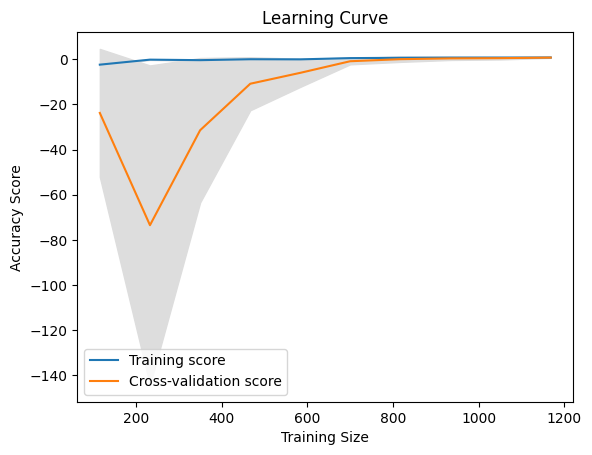

In [30]:
# Crear rangos de tamaños de entrenamiento
train_sizes = np.linspace(0.1, 1.0, 10)

# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5)

# Calcular las medias y desviaciones estándar de los puntajes de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dibujar las curvas de aprendizaje
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Crear la leyenda y los títulos
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()

# Modelo 2 SalePrice

In [31]:
model1 = make_pipeline(preprocesador, MLPRegressor(hidden_layer_sizes=(100, 50), activation='logistic', solver='adam', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.0002, max_iter=500, shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-20, n_iter_no_change=10))
model1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(activation='logistic', alpha=0.001, epsilon=1e-20,
                              hidden_layer_sizes=(100, 50),
                              learning_rate_init=0.0002, max_iter=500,
                              verbose=True))])

In [32]:
# Ajustar el modelo
model1.fit(X_train, y_train)

Iteration 1, loss = 19401000151.59289169
Iteration 2, loss = 19400978525.21993256
Iteration 3, loss = 19400957145.03267288
Iteration 4, loss = 19400935895.54676056
Iteration 5, loss = 19400914222.47246933
Iteration 6, loss = 19400891617.38912582
Iteration 7, loss = 19400868491.16460419
Iteration 8, loss = 19400845384.28848648
Iteration 9, loss = 19400821829.91747665
Iteration 10, loss = 19400797888.90268707
Iteration 11, loss = 19400771683.47286224
Iteration 12, loss = 19400746158.27952576
Iteration 13, loss = 19400722012.02410507
Iteration 14, loss = 19400696704.42447662
Iteration 15, loss = 19400668728.10109711
Iteration 16, loss = 19400641713.63415527
Iteration 17, loss = 19400616931.25100708
Iteration 18, loss = 19400594387.23678970
Iteration 19, loss = 19400572884.27419281
Iteration 20, loss = 19400550677.15783691
Iteration 21, loss = 19400529594.29872513
Iteration 22, loss = 19400508399.34207153
Iteration 23, loss = 19400484923.13929367
Iteration 24, loss = 19400458949.80401993
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(activation='logistic', alpha=0.001, epsilon=1e-20,
                              hidden_layer_sizes=(100, 50),
                              learning_rate_init=0.0002, max_iter=500,
                              verbose=True))])

In [33]:
pred2 = model1.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, pred2)
print("MSE (test):", mse)
mae_test = mean_absolute_error(y_test, pred2)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse)
print("RMSE (test):", rmse_test)

MSE (test): 39556769162.791405
MAE (test): 183315.31077316497
RMSE (test): 198888.83619447172


Iteration 1, loss = 20632638753.01309586
Iteration 2, loss = 20632635289.55812836
Iteration 3, loss = 20632631826.79347992
Iteration 4, loss = 20632628365.10167313
Iteration 5, loss = 20632624904.81596756
Iteration 6, loss = 20632621446.20607758
Iteration 7, loss = 20632617989.46562195
Iteration 8, loss = 20632614534.71850586
Iteration 9, loss = 20632611082.04491043
Iteration 10, loss = 20632607631.49577713
Iteration 11, loss = 20632604183.08618546
Iteration 12, loss = 20632600736.78420258
Iteration 13, loss = 20632597292.50434113
Iteration 14, loss = 20632593850.10543442
Iteration 15, loss = 20632590409.39192963
Iteration 16, loss = 20632586970.11746979
Iteration 17, loss = 20632583531.99072647
Iteration 18, loss = 20632580094.68300629
Iteration 19, loss = 20632576657.83756256
Iteration 20, loss = 20632573221.08028793
Iteration 21, loss = 20632569784.03158188
Iteration 22, loss = 20632566346.31881332
Iteration 23, loss = 20632562907.58901596
Iteration 24, loss = 20632559467.52124023
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 20336583131.57483673
Iteration 5, loss = 20336576336.79987717
Iteration 6, loss = 20336569416.16609573
Iteration 7, loss = 20336562544.64186478
Iteration 8, loss = 20336555589.98603821
Iteration 9, loss = 20336548698.99325180
Iteration 10, loss = 20336541754.44895554
Iteration 11, loss = 20336534741.88965607
Iteration 12, loss = 20336527806.21246338
Iteration 13, loss = 20336520750.28981018
Iteration 14, loss = 20336513760.74702454
Iteration 15, loss = 20336506738.36261368
Iteration 16, loss = 20336499704.76295853
Iteration 17, loss = 20336492624.49753189
Iteration 18, loss = 20336485596.24277496
Iteration 19, loss = 20336478566.91542816
Iteration 20, loss = 20336471451.98649216
Iteration 21, loss = 20336464412.57891464
Iteration 22, loss = 20336457287.49838257
Iteration 23, loss = 20336450111.43387604
Iteration 24, loss = 20336442936.53740692
Iteration 25, loss = 20336435769.56435394
Iteration 26, loss = 20336428436.19527054
Iteration 27, loss = 20336421047.4599494

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 19974864630.77791977
Iteration 39, loss = 19974857164.93875122
Iteration 40, loss = 19974849872.16511536
Iteration 41, loss = 19974842541.47419357
Iteration 42, loss = 19974835518.28575897
Iteration 43, loss = 19974828378.45299911
Iteration 44, loss = 19974821226.47838211
Iteration 45, loss = 19974814078.12045288
Iteration 46, loss = 19974806849.12601471
Iteration 47, loss = 19974799526.96113586
Iteration 48, loss = 19974792066.81649399
Iteration 49, loss = 19974784554.24045181
Iteration 50, loss = 19974776834.70552826
Iteration 51, loss = 19974769059.36693192
Iteration 52, loss = 19974760962.62613678
Iteration 53, loss = 19974752797.36404037
Iteration 54, loss = 19974744731.65302277
Iteration 55, loss = 19974736511.34195328
Iteration 56, loss = 19974728168.85870361
Iteration 57, loss = 19974719584.36518860
Iteration 58, loss = 19974710692.34634781
Iteration 59, loss = 19974701453.07207108
Iteration 60, loss = 19974692050.67278671
Iteration 61, loss = 19974682743.9

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 20536409314.49314880
Iteration 12, loss = 20536397455.28472519
Iteration 13, loss = 20536385560.51794052
Iteration 14, loss = 20536373796.05026245
Iteration 15, loss = 20536362012.74294281
Iteration 16, loss = 20536350554.48775482
Iteration 17, loss = 20536338813.17647171
Iteration 18, loss = 20536327182.38404465
Iteration 19, loss = 20536315174.63798523
Iteration 20, loss = 20536303118.42318344
Iteration 21, loss = 20536290247.43939590
Iteration 22, loss = 20536277211.00455093
Iteration 23, loss = 20536263635.22103119
Iteration 24, loss = 20536249625.01258087
Iteration 25, loss = 20536235383.82621002
Iteration 26, loss = 20536220932.15052032
Iteration 27, loss = 20536205522.96800232
Iteration 28, loss = 20536189417.59002686
Iteration 29, loss = 20536172493.94004822
Iteration 30, loss = 20536155102.28503418
Iteration 31, loss = 20536137497.42429352
Iteration 32, loss = 20536119885.86545944
Iteration 33, loss = 20536102874.80537415
Iteration 34, loss = 20536086373.6

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 20424207639.07934570
Iteration 5, loss = 20424197836.74355698
Iteration 6, loss = 20424187956.12644577
Iteration 7, loss = 20424177852.24545288
Iteration 8, loss = 20424167865.75755692
Iteration 9, loss = 20424157804.93844223
Iteration 10, loss = 20424147731.89659882
Iteration 11, loss = 20424137545.48403549
Iteration 12, loss = 20424127332.09767151
Iteration 13, loss = 20424116966.03123474
Iteration 14, loss = 20424106806.49534607
Iteration 15, loss = 20424096431.45946121
Iteration 16, loss = 20424086133.02346039
Iteration 17, loss = 20424075834.74794006
Iteration 18, loss = 20424065651.02134323
Iteration 19, loss = 20424055117.92479324
Iteration 20, loss = 20424044298.73371506
Iteration 21, loss = 20424032934.13531494
Iteration 22, loss = 20424021043.27559662
Iteration 23, loss = 20424008682.36227417
Iteration 24, loss = 20423995537.02050018
Iteration 25, loss = 20423982143.54685211
Iteration 26, loss = 20423968224.88473129
Iteration 27, loss = 20423954493.1395072

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 20078881559.80739212
Iteration 9, loss = 20078869391.06755066
Iteration 10, loss = 20078857108.24632263
Iteration 11, loss = 20078844900.28237534
Iteration 12, loss = 20078831874.53274918
Iteration 13, loss = 20078817979.40587616
Iteration 14, loss = 20078803356.30852127
Iteration 15, loss = 20078788637.40092850
Iteration 16, loss = 20078774650.13951492
Iteration 17, loss = 20078761279.26527786
Iteration 18, loss = 20078747626.16677094
Iteration 19, loss = 20078733229.03605652
Iteration 20, loss = 20078718680.46402359
Iteration 21, loss = 20078705056.88214111
Iteration 22, loss = 20078692085.71418381
Iteration 23, loss = 20078679116.45850372
Iteration 24, loss = 20078665548.26457977
Iteration 25, loss = 20078652057.74121857
Iteration 26, loss = 20078639922.41952896
Iteration 27, loss = 20078627871.63809967
Iteration 28, loss = 20078615678.42396164
Iteration 29, loss = 20078602500.90915298
Iteration 30, loss = 20078587469.99647141
Iteration 31, loss = 20078570801.236

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 19680465254.68727875
Iteration 2, loss = 19680450451.87554932
Iteration 3, loss = 19680435453.99296188
Iteration 4, loss = 19680420098.38835526
Iteration 5, loss = 19680404273.52161407
Iteration 6, loss = 19680388186.40615845
Iteration 7, loss = 19680372570.43691635
Iteration 8, loss = 19680357275.28140640
Iteration 9, loss = 19680342504.15334702
Iteration 10, loss = 19680327537.54987335
Iteration 11, loss = 19680311833.85990524
Iteration 12, loss = 19680295259.87276077
Iteration 13, loss = 19680278555.27003860
Iteration 14, loss = 19680262434.06859589
Iteration 15, loss = 19680247182.47871399
Iteration 16, loss = 19680230521.17057800
Iteration 17, loss = 19680211744.56276321
Iteration 18, loss = 19680192702.66510391
Iteration 19, loss = 19680174677.34383774
Iteration 20, loss = 19680156735.15647125
Iteration 21, loss = 19680136459.88061905
Iteration 22, loss = 19680114134.25431442
Iteration 23, loss = 19680093993.07303619
Iteration 24, loss = 19680075425.57659149
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 19707712111.36474609
Iteration 9, loss = 19707692202.34388351
Iteration 10, loss = 19707671506.61727142
Iteration 11, loss = 19707650253.61833572
Iteration 12, loss = 19707630743.34643173
Iteration 13, loss = 19707612479.36899185
Iteration 14, loss = 19707594006.40234756
Iteration 15, loss = 19707576209.30529785
Iteration 16, loss = 19707559308.23118973
Iteration 17, loss = 19707542484.82682419
Iteration 18, loss = 19707524890.25414276
Iteration 19, loss = 19707503108.61790085
Iteration 20, loss = 19707474934.46420670
Iteration 21, loss = 19707443077.30986404
Iteration 22, loss = 19707414859.29569626
Iteration 23, loss = 19707391177.36176300
Iteration 24, loss = 19707369998.51835251
Iteration 25, loss = 19707350123.11136246
Iteration 26, loss = 19707329760.82427597
Iteration 27, loss = 19707307602.89912415
Iteration 28, loss = 19707288910.20776749
Iteration 29, loss = 19707272946.12252426
Iteration 30, loss = 19707257906.45249939
Iteration 31, loss = 19707242891.815

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 19632705622.70125198
Iteration 4, loss = 19632682898.50147629
Iteration 5, loss = 19632661179.61519623
Iteration 6, loss = 19632640427.31684494
Iteration 7, loss = 19632619970.69192505
Iteration 8, loss = 19632598062.50653458
Iteration 9, loss = 19632574387.42738342
Iteration 10, loss = 19632548713.63397980
Iteration 11, loss = 19632522444.22057343
Iteration 12, loss = 19632495640.76118851
Iteration 13, loss = 19632467484.27603149
Iteration 14, loss = 19632441824.33712387
Iteration 15, loss = 19632416073.91521072
Iteration 16, loss = 19632392313.82824707
Iteration 17, loss = 19632369139.72177124
Iteration 18, loss = 19632346690.42776489
Iteration 19, loss = 19632326367.50830841
Iteration 20, loss = 19632305374.28705978
Iteration 21, loss = 19632281256.89511490
Iteration 22, loss = 19632259704.01482773
Iteration 23, loss = 19632242139.52097702
Iteration 24, loss = 19632226667.65719223
Iteration 25, loss = 19632210891.09212875
Iteration 26, loss = 19632194490.78774261

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 19579289663.79628754
Iteration 5, loss = 19579266638.71693802
Iteration 6, loss = 19579244455.08314514
Iteration 7, loss = 19579222542.44089508
Iteration 8, loss = 19579200345.25845718
Iteration 9, loss = 19579177542.15697098
Iteration 10, loss = 19579154921.91152954
Iteration 11, loss = 19579130691.20666504
Iteration 12, loss = 19579108718.25055695
Iteration 13, loss = 19579087966.96644211
Iteration 14, loss = 19579065398.12862015
Iteration 15, loss = 19579039254.73528290
Iteration 16, loss = 19579012558.21730042
Iteration 17, loss = 19578988691.15987778
Iteration 18, loss = 19578967163.14011765
Iteration 19, loss = 19578943627.61467361
Iteration 20, loss = 19578920542.17760468
Iteration 21, loss = 19578897742.53639221
Iteration 22, loss = 19578875430.18182373
Iteration 23, loss = 19578857038.81950378
Iteration 24, loss = 19578840556.95048141
Iteration 25, loss = 19578825846.15983963
Iteration 26, loss = 19578811398.20244217
Iteration 27, loss = 19578795907.9098739

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 17987341171.76605606
Iteration 59, loss = 17987337279.61559296
Iteration 60, loss = 17987333382.49005508
Iteration 61, loss = 17987329480.74117279
Iteration 62, loss = 17987325574.73553467
Iteration 63, loss = 17987321664.85406113
Iteration 64, loss = 17987317751.49137115
Iteration 65, loss = 17987313835.05527115
Iteration 66, loss = 17987309915.96604919
Iteration 67, loss = 17987305994.65589142
Iteration 68, loss = 17987302071.56824875
Iteration 69, loss = 17987298147.15717697
Iteration 70, loss = 17987294221.88668060
Iteration 71, loss = 17987290296.23004532
Iteration 72, loss = 17987286370.66917801
Iteration 73, loss = 17987282445.69391251
Iteration 74, loss = 17987278521.80134201
Iteration 75, loss = 17987274599.49514771
Iteration 76, loss = 17987270679.28488541
Iteration 77, loss = 17987266761.68531418
Iteration 78, loss = 17987262847.21569824
Iteration 79, loss = 17987258936.39915085
Iteration 80, loss = 17987255029.76187515
Iteration 81, loss = 17987251127.8

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 19463337216.27350998
Iteration 35, loss = 19463329967.17918015
Iteration 36, loss = 19463322792.47525406
Iteration 37, loss = 19463315487.37727737
Iteration 38, loss = 19463308329.98976898
Iteration 39, loss = 19463301186.40396500
Iteration 40, loss = 19463294120.69759750
Iteration 41, loss = 19463287066.63666916
Iteration 42, loss = 19463280083.11867523
Iteration 43, loss = 19463273162.35197830
Iteration 44, loss = 19463266239.82275772
Iteration 45, loss = 19463259474.67157364
Iteration 46, loss = 19463252698.45542145
Iteration 47, loss = 19463245917.99810791
Iteration 48, loss = 19463239353.03229904
Iteration 49, loss = 19463232722.37239075
Iteration 50, loss = 19463226191.50002670
Iteration 51, loss = 19463219770.00920105
Iteration 52, loss = 19463213318.15002060
Iteration 53, loss = 19463206937.64693451
Iteration 54, loss = 19463200577.04048920
Iteration 55, loss = 19463194299.53387833
Iteration 56, loss = 19463188044.90900803
Iteration 57, loss = 19463181813.8

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 19353544471.24983215
Iteration 32, loss = 19353535193.20143509
Iteration 33, loss = 19353525931.88705826
Iteration 34, loss = 19353516629.84339905
Iteration 35, loss = 19353507396.15962219
Iteration 36, loss = 19353498147.26670837
Iteration 37, loss = 19353488803.35081100
Iteration 38, loss = 19353479472.60750580
Iteration 39, loss = 19353469953.95492172
Iteration 40, loss = 19353460527.94155121
Iteration 41, loss = 19353451025.25856018
Iteration 42, loss = 19353441423.11613464
Iteration 43, loss = 19353432037.33214188
Iteration 44, loss = 19353422562.31039047
Iteration 45, loss = 19353413187.07041168
Iteration 46, loss = 19353403781.06526947
Iteration 47, loss = 19353394398.44264221
Iteration 48, loss = 19353385292.19700241
Iteration 49, loss = 19353376138.12405014
Iteration 50, loss = 19353367042.48860168
Iteration 51, loss = 19353357948.75527573
Iteration 52, loss = 19353349025.34273911
Iteration 53, loss = 19353340217.08311844
Iteration 54, loss = 19353331412.6

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 20070623509.10908508
Iteration 17, loss = 20070611941.68344498
Iteration 18, loss = 20070600546.88348007
Iteration 19, loss = 20070589080.84768295
Iteration 20, loss = 20070577428.94383240
Iteration 21, loss = 20070565621.11481476
Iteration 22, loss = 20070553700.49416733
Iteration 23, loss = 20070541537.17120743
Iteration 24, loss = 20070529194.77476883
Iteration 25, loss = 20070516409.75134659
Iteration 26, loss = 20070503759.35451126
Iteration 27, loss = 20070490979.86036682
Iteration 28, loss = 20070478257.22274780
Iteration 29, loss = 20070465407.59707260
Iteration 30, loss = 20070452382.12775040
Iteration 31, loss = 20070439099.82965088
Iteration 32, loss = 20070425817.41790009
Iteration 33, loss = 20070412424.48216248
Iteration 34, loss = 20070399166.47802353
Iteration 35, loss = 20070386636.72269821
Iteration 36, loss = 20070374388.16509247
Iteration 37, loss = 20070362508.58838654
Iteration 38, loss = 20070350873.25119781
Iteration 39, loss = 20070339469.7

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 20051832740.35468674
Iteration 6, loss = 20051822326.42830276
Iteration 7, loss = 20051811887.85482407
Iteration 8, loss = 20051801671.95055008
Iteration 9, loss = 20051791231.88624573
Iteration 10, loss = 20051780770.30600739
Iteration 11, loss = 20051770324.37010956
Iteration 12, loss = 20051759581.33635712
Iteration 13, loss = 20051749035.04626465
Iteration 14, loss = 20051738458.25971985
Iteration 15, loss = 20051727769.77931976
Iteration 16, loss = 20051717283.85611725
Iteration 17, loss = 20051706853.58053970
Iteration 18, loss = 20051696259.38181686
Iteration 19, loss = 20051685784.18964386
Iteration 20, loss = 20051675584.34090042
Iteration 21, loss = 20051665268.19827652
Iteration 22, loss = 20051654906.63253784
Iteration 23, loss = 20051644412.77379608
Iteration 24, loss = 20051633480.34505463
Iteration 25, loss = 20051622476.55678940
Iteration 26, loss = 20051610994.12441254
Iteration 27, loss = 20051599607.76436234
Iteration 28, loss = 20051588248.623146

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 19768196612.52438736
Iteration 2, loss = 19768183747.22285843
Iteration 3, loss = 19768170807.28268433
Iteration 4, loss = 19768157735.38183975
Iteration 5, loss = 19768144467.90162659
Iteration 6, loss = 19768131166.23758698
Iteration 7, loss = 19768117724.88376999
Iteration 8, loss = 19768104436.74849319
Iteration 9, loss = 19768091256.96015930
Iteration 10, loss = 19768078192.30218887
Iteration 11, loss = 19768065104.57229614
Iteration 12, loss = 19768051685.70129395
Iteration 13, loss = 19768038376.58946991
Iteration 14, loss = 19768025286.11888504
Iteration 15, loss = 19768011914.84448624
Iteration 16, loss = 19767998084.08216095
Iteration 17, loss = 19767983475.11812592
Iteration 18, loss = 19767968239.93444061
Iteration 19, loss = 19767952709.68826675
Iteration 20, loss = 19767937317.04909134
Iteration 21, loss = 19767922448.05238342
Iteration 22, loss = 19767907661.35712433
Iteration 23, loss = 19767893111.70991516
Iteration 24, loss = 19767878820.31183243
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 19414229186.43280792
Iteration 6, loss = 19414209011.39141846
Iteration 7, loss = 19414188890.01157379
Iteration 8, loss = 19414168456.12849426
Iteration 9, loss = 19414147808.06261063
Iteration 10, loss = 19414126658.48350143
Iteration 11, loss = 19414105490.49875259
Iteration 12, loss = 19414084066.49913788
Iteration 13, loss = 19414062196.58309555
Iteration 14, loss = 19414041017.78796768
Iteration 15, loss = 19414020376.57186890
Iteration 16, loss = 19413999487.23495483
Iteration 17, loss = 19413978851.91622925
Iteration 18, loss = 19413958698.91132355
Iteration 19, loss = 19413938655.21179199
Iteration 20, loss = 19413917601.59851456
Iteration 21, loss = 19413897270.36348343
Iteration 22, loss = 19413878033.88345718
Iteration 23, loss = 19413858947.58031845
Iteration 24, loss = 19413842366.18979263
Iteration 25, loss = 19413827062.88560867
Iteration 26, loss = 19413812199.12335587
Iteration 27, loss = 19413796967.39970779
Iteration 28, loss = 19413781189.594429

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 19474695218.10513687
Iteration 16, loss = 19474675813.97188950
Iteration 17, loss = 19474654287.51887894
Iteration 18, loss = 19474631477.80083084
Iteration 19, loss = 19474609265.57312775
Iteration 20, loss = 19474587495.44168091
Iteration 21, loss = 19474564974.11891174
Iteration 22, loss = 19474543271.78822327
Iteration 23, loss = 19474524617.80777359
Iteration 24, loss = 19474507661.73944473
Iteration 25, loss = 19474491381.82555771
Iteration 26, loss = 19474475330.30582809
Iteration 27, loss = 19474460196.34688568
Iteration 28, loss = 19474445809.51781464
Iteration 29, loss = 19474432029.61388397
Iteration 30, loss = 19474418739.55691147
Iteration 31, loss = 19474405931.62511444
Iteration 32, loss = 19474393952.55177307
Iteration 33, loss = 19474383426.44019699
Iteration 34, loss = 19474373350.43171692
Iteration 35, loss = 19474363241.61344528
Iteration 36, loss = 19474353137.61011887
Iteration 37, loss = 19474343047.56380844
Iteration 38, loss = 19474333284.4

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 19425590642.66303253
Iteration 9, loss = 19425566770.77719498
Iteration 10, loss = 19425542832.64921570
Iteration 11, loss = 19425518286.94738388
Iteration 12, loss = 19425492963.36310959
Iteration 13, loss = 19425468847.20220566
Iteration 14, loss = 19425446222.14669037
Iteration 15, loss = 19425425257.21216583
Iteration 16, loss = 19425404847.02590942
Iteration 17, loss = 19425385246.68294525
Iteration 18, loss = 19425365862.71534729
Iteration 19, loss = 19425345519.88361740
Iteration 20, loss = 19425323202.57359314
Iteration 21, loss = 19425300499.32593536
Iteration 22, loss = 19425280393.32467651
Iteration 23, loss = 19425260699.80768204
Iteration 24, loss = 19425240776.00478745
Iteration 25, loss = 19425221422.89087296
Iteration 26, loss = 19425205250.86014175
Iteration 27, loss = 19425191220.54944611
Iteration 28, loss = 19425176939.62979126
Iteration 29, loss = 19425162208.69906616
Iteration 30, loss = 19425147554.10058594
Iteration 31, loss = 19425132601.291

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 19393269937.93341064
Iteration 3, loss = 19393250172.67404175
Iteration 4, loss = 19393230329.89141083
Iteration 5, loss = 19393210233.53638077
Iteration 6, loss = 19393190082.18137360
Iteration 7, loss = 19393170206.46842957
Iteration 8, loss = 19393149994.77949905
Iteration 9, loss = 19393128292.13942719
Iteration 10, loss = 19393106979.62553024
Iteration 11, loss = 19393086265.55020142
Iteration 12, loss = 19393065440.68710709
Iteration 13, loss = 19393043949.40111923
Iteration 14, loss = 19393020786.35652542
Iteration 15, loss = 19392997735.05371094
Iteration 16, loss = 19392976089.48819733
Iteration 17, loss = 19392954955.89883804
Iteration 18, loss = 19392934464.94556808
Iteration 19, loss = 19392915057.74631119
Iteration 20, loss = 19392897227.18534470
Iteration 21, loss = 19392880261.03998184
Iteration 22, loss = 19392863024.22808075
Iteration 23, loss = 19392843916.26249695
Iteration 24, loss = 19392827124.17530823
Iteration 25, loss = 19392811183.19968033


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 17987868708.80720520
Iteration 2, loss = 17987865341.15207672
Iteration 3, loss = 17987861975.84090042
Iteration 4, loss = 17987858613.01008606
Iteration 5, loss = 17987855252.79813004
Iteration 6, loss = 17987851895.30023575
Iteration 7, loss = 17987848540.53878403
Iteration 8, loss = 17987845188.46746063
Iteration 9, loss = 17987841838.99529266
Iteration 10, loss = 17987838492.00408936
Iteration 11, loss = 17987835147.35228348
Iteration 12, loss = 17987831804.87564468
Iteration 13, loss = 17987828464.39094925
Iteration 14, loss = 17987825125.70275116
Iteration 15, loss = 17987821788.61162567
Iteration 16, loss = 17987818452.92202759
Iteration 17, loss = 17987815118.44860458
Iteration 18, loss = 17987811785.02089691
Iteration 19, loss = 17987808452.48631287
Iteration 20, loss = 17987805120.71129608
Iteration 21, loss = 17987801789.58093643
Iteration 22, loss = 17987798458.99736786
Iteration 23, loss = 17987795128.87774658
Iteration 24, loss = 17987791799.15212250
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 19463686797.30218887
Iteration 5, loss = 19463679830.34437561
Iteration 6, loss = 19463672784.42751312
Iteration 7, loss = 19463665761.31899643
Iteration 8, loss = 19463658723.68129730
Iteration 9, loss = 19463651686.08979416
Iteration 10, loss = 19463644641.75848770
Iteration 11, loss = 19463637538.31682205
Iteration 12, loss = 19463630399.84965897
Iteration 13, loss = 19463623349.15642548
Iteration 14, loss = 19463616153.75099182
Iteration 15, loss = 19463609001.52485275
Iteration 16, loss = 19463601843.47927856
Iteration 17, loss = 19463594589.24472046
Iteration 18, loss = 19463587368.58481598
Iteration 19, loss = 19463580052.16106033
Iteration 20, loss = 19463572773.74872589
Iteration 21, loss = 19463565369.89645386
Iteration 22, loss = 19463558054.38664246
Iteration 23, loss = 19463550696.93200684
Iteration 24, loss = 19463543245.68175507
Iteration 25, loss = 19463535853.69273758
Iteration 26, loss = 19463528427.17734909
Iteration 27, loss = 19463520997.2437629

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 20102086375.56575775
Iteration 34, loss = 20102078160.31543732
Iteration 35, loss = 20102069920.17232895
Iteration 36, loss = 20102061574.44699097
Iteration 37, loss = 20102053272.12621689
Iteration 38, loss = 20102045022.09368515
Iteration 39, loss = 20102036608.17951584
Iteration 40, loss = 20102028288.93171310
Iteration 41, loss = 20102019889.80214691
Iteration 42, loss = 20102011630.78833008
Iteration 43, loss = 20102003360.10615921
Iteration 44, loss = 20101995180.54457092
Iteration 45, loss = 20101987157.70563507
Iteration 46, loss = 20101979180.64173889
Iteration 47, loss = 20101971221.65922546
Iteration 48, loss = 20101963401.56014633
Iteration 49, loss = 20101955682.80260468
Iteration 50, loss = 20101948027.26679230
Iteration 51, loss = 20101940530.98664856
Iteration 52, loss = 20101933046.72742844
Iteration 53, loss = 20101925654.94107819
Iteration 54, loss = 20101918387.04451752
Iteration 55, loss = 20101911074.34202957
Iteration 56, loss = 20101903933.5

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 19475845536.95424652
Iteration 2, loss = 19475836155.50405121
Iteration 3, loss = 19475826720.50008392
Iteration 4, loss = 19475817280.48223495
Iteration 5, loss = 19475807834.31633377
Iteration 6, loss = 19475798356.32258606
Iteration 7, loss = 19475788802.94334030
Iteration 8, loss = 19475779224.20716095
Iteration 9, loss = 19475769557.77396393
Iteration 10, loss = 19475759883.39633942
Iteration 11, loss = 19475750150.81683731
Iteration 12, loss = 19475740126.93750000
Iteration 13, loss = 19475730095.65172577
Iteration 14, loss = 19475719786.04753113
Iteration 15, loss = 19475709409.13853073
Iteration 16, loss = 19475698700.09065628
Iteration 17, loss = 19475687819.78828430
Iteration 18, loss = 19475676587.51718903
Iteration 19, loss = 19475665338.49619293
Iteration 20, loss = 19475653708.67870712
Iteration 21, loss = 19475642101.08198166
Iteration 22, loss = 19475630234.48559189
Iteration 23, loss = 19475618262.41347122
Iteration 24, loss = 19475606384.77935410
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 19652864504.08049393
Iteration 11, loss = 19652854502.34032440
Iteration 12, loss = 19652844217.29954910
Iteration 13, loss = 19652833865.55110931
Iteration 14, loss = 19652823302.97292328
Iteration 15, loss = 19652812651.85285187
Iteration 16, loss = 19652801703.55297089
Iteration 17, loss = 19652790585.15927887
Iteration 18, loss = 19652779279.86614990
Iteration 19, loss = 19652767375.99906540
Iteration 20, loss = 19652755187.61461258
Iteration 21, loss = 19652742785.00876236
Iteration 22, loss = 19652730299.49724197
Iteration 23, loss = 19652717694.10046387
Iteration 24, loss = 19652705071.43713379
Iteration 25, loss = 19652692432.99133682
Iteration 26, loss = 19652679904.35791779
Iteration 27, loss = 19652667612.10494232
Iteration 28, loss = 19652655389.15862274
Iteration 29, loss = 19652643637.37440491
Iteration 30, loss = 19652632117.69447708
Iteration 31, loss = 19652620743.32094955
Iteration 32, loss = 19652609620.93162918
Iteration 33, loss = 19652598551.7

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 19435323076.86759567
Iteration 12, loss = 19435310300.62524414
Iteration 13, loss = 19435296929.40905762
Iteration 14, loss = 19435282933.93177795
Iteration 15, loss = 19435268536.59079361
Iteration 16, loss = 19435253826.18938065
Iteration 17, loss = 19435239183.60539246
Iteration 18, loss = 19435224128.59134674
Iteration 19, loss = 19435208772.39807892
Iteration 20, loss = 19435193473.95656204
Iteration 21, loss = 19435177917.20681000
Iteration 22, loss = 19435161944.25658035
Iteration 23, loss = 19435145151.52419662
Iteration 24, loss = 19435128515.49859238
Iteration 25, loss = 19435111893.22410583
Iteration 26, loss = 19435094912.93298721
Iteration 27, loss = 19435077722.90287018
Iteration 28, loss = 19435061097.27845001
Iteration 29, loss = 19435044824.65966034
Iteration 30, loss = 19435028900.18770981
Iteration 31, loss = 19435013509.27238083
Iteration 32, loss = 19434998865.19968796
Iteration 33, loss = 19434984997.02602005
Iteration 34, loss = 19434971998.2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 19128971477.56197739
Iteration 6, loss = 19128955114.21975708
Iteration 7, loss = 19128938451.66409683
Iteration 8, loss = 19128921327.31320572
Iteration 9, loss = 19128903707.18842697
Iteration 10, loss = 19128885603.04390335
Iteration 11, loss = 19128866971.73616028
Iteration 12, loss = 19128847500.70093155
Iteration 13, loss = 19128828049.51852798
Iteration 14, loss = 19128808696.50525665
Iteration 15, loss = 19128789015.11434174
Iteration 16, loss = 19128769306.28247452
Iteration 17, loss = 19128749325.55341721
Iteration 18, loss = 19128729378.97643280
Iteration 19, loss = 19128709132.05474091
Iteration 20, loss = 19128687555.82604599
Iteration 21, loss = 19128664833.52944946
Iteration 22, loss = 19128643020.56500244
Iteration 23, loss = 19128622136.26401520
Iteration 24, loss = 19128601198.11251068
Iteration 25, loss = 19128578670.58069611
Iteration 26, loss = 19128556656.07390976
Iteration 27, loss = 19128536914.29952240
Iteration 28, loss = 19128517312.730739

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 19225316891.26707077
Iteration 11, loss = 19225300737.91931152
Iteration 12, loss = 19225284343.10765839
Iteration 13, loss = 19225267486.95941925
Iteration 14, loss = 19225250750.65312958
Iteration 15, loss = 19225234839.56737900
Iteration 16, loss = 19225217790.80046844
Iteration 17, loss = 19225200338.63596725
Iteration 18, loss = 19225182873.30519867
Iteration 19, loss = 19225165331.53217316
Iteration 20, loss = 19225147624.90218353
Iteration 21, loss = 19225129696.82348251
Iteration 22, loss = 19225111265.47605896
Iteration 23, loss = 19225092061.43204498
Iteration 24, loss = 19225074026.60936356
Iteration 25, loss = 19225056890.25037766
Iteration 26, loss = 19225040756.63400269
Iteration 27, loss = 19225024219.40807343
Iteration 28, loss = 19225008094.45530701
Iteration 29, loss = 19224992951.91188049
Iteration 30, loss = 19224978892.75200272
Iteration 31, loss = 19224965096.79926682
Iteration 32, loss = 19224951671.65027618
Iteration 33, loss = 19224938915.4

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 19203828477.48357773
Iteration 11, loss = 19203800842.14887238
Iteration 12, loss = 19203771670.58734894
Iteration 13, loss = 19203744002.56703568
Iteration 14, loss = 19203719901.91313934
Iteration 15, loss = 19203695671.52560425
Iteration 16, loss = 19203669486.85149002
Iteration 17, loss = 19203645387.25576019
Iteration 18, loss = 19203622486.32218933
Iteration 19, loss = 19203599418.40811539
Iteration 20, loss = 19203577350.12702560
Iteration 21, loss = 19203555393.84100723
Iteration 22, loss = 19203531654.96068954
Iteration 23, loss = 19203507829.42569733
Iteration 24, loss = 19203486411.23812103
Iteration 25, loss = 19203466307.90058517
Iteration 26, loss = 19203447813.76525116
Iteration 27, loss = 19203430497.01518250
Iteration 28, loss = 19203414231.60929489
Iteration 29, loss = 19203399818.07426453
Iteration 30, loss = 19203386378.50759506
Iteration 31, loss = 19203373941.54582214
Iteration 32, loss = 19203362386.03619003
Iteration 33, loss = 19203351192.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 19193757307.37649536
Iteration 2, loss = 19193738322.93878937
Iteration 3, loss = 19193719556.88265991
Iteration 4, loss = 19193700086.43210220
Iteration 5, loss = 19193679323.98862076
Iteration 6, loss = 19193658020.81785583
Iteration 7, loss = 19193636064.00794601
Iteration 8, loss = 19193614060.71626282
Iteration 9, loss = 19193592797.89460754
Iteration 10, loss = 19193571521.01971436
Iteration 11, loss = 19193550145.06711960
Iteration 12, loss = 19193528670.30910110
Iteration 13, loss = 19193505908.89410019
Iteration 14, loss = 19193482667.21595764
Iteration 15, loss = 19193461156.90984344
Iteration 16, loss = 19193439917.37041473
Iteration 17, loss = 19193418740.84685516
Iteration 18, loss = 19193398546.21846008
Iteration 19, loss = 19193379790.93571472
Iteration 20, loss = 19193362762.95495605
Iteration 21, loss = 19193345361.33510971
Iteration 22, loss = 19193326994.96060562
Iteration 23, loss = 19193311054.58944321
Iteration 24, loss = 19193297140.68815231
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 75, loss = 17987304235.03658295
Iteration 76, loss = 17987300232.95326614
Iteration 77, loss = 17987296235.09698105
Iteration 78, loss = 17987292242.04181290
Iteration 79, loss = 17987288254.36571884
Iteration 80, loss = 17987284272.64971542
Iteration 81, loss = 17987280297.47715378
Iteration 82, loss = 17987276329.43288803
Iteration 83, loss = 17987272369.10253525
Iteration 84, loss = 17987268417.07166290
Iteration 85, loss = 17987264473.92504883
Iteration 86, loss = 17987260540.24585724
Iteration 87, loss = 17987256616.61485672
Iteration 88, loss = 17987252703.60964966
Iteration 89, loss = 17987248801.80386353
Iteration 90, loss = 17987244911.76637268
Iteration 91, loss = 17987241034.06053162
Iteration 92, loss = 17987237169.24336624
Iteration 93, loss = 17987233317.86484909
Iteration 94, loss = 17987229480.46708298
Iteration 95, loss = 17987225657.58361816
Iteration 96, loss = 17987221849.73864746
Iteration 97, loss = 17987218057.44639587
Iteration 98, loss = 17987214281.2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 52, loss = 19463247921.16941452
Iteration 53, loss = 19463239788.50819016
Iteration 54, loss = 19463231620.77262497
Iteration 55, loss = 19463223641.32960129
Iteration 56, loss = 19463215748.69249725
Iteration 57, loss = 19463207948.25492096
Iteration 58, loss = 19463200254.25730515
Iteration 59, loss = 19463192645.57788849
Iteration 60, loss = 19463185188.85775375
Iteration 61, loss = 19463177814.78945923
Iteration 62, loss = 19463170556.77132416
Iteration 63, loss = 19463163277.72528076
Iteration 64, loss = 19463156134.71446991
Iteration 65, loss = 19463149237.45204544
Iteration 66, loss = 19463142282.82299042
Iteration 67, loss = 19463135490.73851013
Iteration 68, loss = 19463128845.37780380
Iteration 69, loss = 19463122249.36001587
Iteration 70, loss = 19463115904.70162582
Iteration 71, loss = 19463109574.14678955
Iteration 72, loss = 19463103392.98412323
Iteration 73, loss = 19463097288.23736572
Iteration 74, loss = 19463091343.64222336
Iteration 75, loss = 19463085546.1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 20102386861.32903290
Iteration 2, loss = 20102379649.98853302
Iteration 3, loss = 20102372397.12948608
Iteration 4, loss = 20102365131.01738358
Iteration 5, loss = 20102358006.95439148
Iteration 6, loss = 20102350684.55485916
Iteration 7, loss = 20102343446.23471451
Iteration 8, loss = 20102336209.00228119
Iteration 9, loss = 20102329037.34987259
Iteration 10, loss = 20102321736.46797562
Iteration 11, loss = 20102314492.00960541
Iteration 12, loss = 20102307295.71492004
Iteration 13, loss = 20102299971.27399063
Iteration 14, loss = 20102292635.39064026
Iteration 15, loss = 20102285344.39586639
Iteration 16, loss = 20102277996.52862167
Iteration 17, loss = 20102270605.52593613
Iteration 18, loss = 20102263128.75922012
Iteration 19, loss = 20102255586.33079910
Iteration 20, loss = 20102248047.89888763
Iteration 21, loss = 20102240428.35975266
Iteration 22, loss = 20102232719.34679031
Iteration 23, loss = 20102224879.72462082
Iteration 24, loss = 20102216931.64396667
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 19475706743.85572052
Iteration 2, loss = 19475696369.38847351
Iteration 3, loss = 19475685973.90608215
Iteration 4, loss = 19475675615.21582794
Iteration 5, loss = 19475665382.87048340
Iteration 6, loss = 19475655231.34703827
Iteration 7, loss = 19475644929.39596939
Iteration 8, loss = 19475634896.50655746
Iteration 9, loss = 19475624783.19981003
Iteration 10, loss = 19475614637.13531113
Iteration 11, loss = 19475604603.72130203
Iteration 12, loss = 19475594396.57902908
Iteration 13, loss = 19475584401.89714432
Iteration 14, loss = 19475574209.93306732
Iteration 15, loss = 19475564157.22604370
Iteration 16, loss = 19475554095.08956909
Iteration 17, loss = 19475543933.34563065
Iteration 18, loss = 19475533739.46698761
Iteration 19, loss = 19475523423.01473236
Iteration 20, loss = 19475513059.39336014
Iteration 21, loss = 19475502550.58423996
Iteration 22, loss = 19475491750.63503265
Iteration 23, loss = 19475480691.41619492
Iteration 24, loss = 19475469500.49915695
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 19652707709.49091721
Iteration 17, loss = 19652697072.23963165
Iteration 18, loss = 19652686568.00749207
Iteration 19, loss = 19652676059.60143661
Iteration 20, loss = 19652665644.84743881
Iteration 21, loss = 19652655193.42883301
Iteration 22, loss = 19652644825.52213669
Iteration 23, loss = 19652634354.37172318
Iteration 24, loss = 19652623929.52309418
Iteration 25, loss = 19652613495.07267380
Iteration 26, loss = 19652603010.59132385
Iteration 27, loss = 19652592670.99920654
Iteration 28, loss = 19652582063.44359589
Iteration 29, loss = 19652571438.43697357
Iteration 30, loss = 19652560722.42948151
Iteration 31, loss = 19652549845.16870880
Iteration 32, loss = 19652538891.31699371
Iteration 33, loss = 19652527906.76652527
Iteration 34, loss = 19652517025.24430847
Iteration 35, loss = 19652506178.31415176
Iteration 36, loss = 19652495425.72109985
Iteration 37, loss = 19652484660.49523544
Iteration 38, loss = 19652473917.26577759
Iteration 39, loss = 19652463303.2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 20145438446.82794189
Iteration 3, loss = 20145424254.32437134
Iteration 4, loss = 20145410204.63375473
Iteration 5, loss = 20145395898.71700287
Iteration 6, loss = 20145381613.71991730
Iteration 7, loss = 20145367424.05930328
Iteration 8, loss = 20145353182.85380936
Iteration 9, loss = 20145339009.54901886
Iteration 10, loss = 20145325150.58625412
Iteration 11, loss = 20145310948.99443054
Iteration 12, loss = 20145296987.00841904
Iteration 13, loss = 20145282645.54600143
Iteration 14, loss = 20145268548.42444992
Iteration 15, loss = 20145254121.53261566
Iteration 16, loss = 20145239769.66078568
Iteration 17, loss = 20145225126.62280273
Iteration 18, loss = 20145210190.93489075
Iteration 19, loss = 20145194521.36791992
Iteration 20, loss = 20145178606.73860168
Iteration 21, loss = 20145162803.71733093
Iteration 22, loss = 20145146856.33858109
Iteration 23, loss = 20145131004.52502060
Iteration 24, loss = 20145115406.14133835
Iteration 25, loss = 20145100321.15439224


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 20308827927.24627686
Iteration 4, loss = 20308811536.29046249
Iteration 5, loss = 20308794937.14836502
Iteration 6, loss = 20308778361.96673965
Iteration 7, loss = 20308761545.78665161
Iteration 8, loss = 20308744237.00302505
Iteration 9, loss = 20308726615.56316376
Iteration 10, loss = 20308709063.77365112
Iteration 11, loss = 20308691650.67272949
Iteration 12, loss = 20308674558.08393097
Iteration 13, loss = 20308656866.44031906
Iteration 14, loss = 20308637913.22274399
Iteration 15, loss = 20308617201.91785812
Iteration 16, loss = 20308596354.37069321
Iteration 17, loss = 20308576485.45679474
Iteration 18, loss = 20308558338.84709549
Iteration 19, loss = 20308541733.97274780
Iteration 20, loss = 20308525775.72699356
Iteration 21, loss = 20308509627.25214767
Iteration 22, loss = 20308493418.82447433
Iteration 23, loss = 20308477542.21455383
Iteration 24, loss = 20308462889.39514923
Iteration 25, loss = 20308449351.27023315
Iteration 26, loss = 20308436209.46118546

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 20261207521.53529358
Iteration 3, loss = 20261188936.54261398
Iteration 4, loss = 20261169736.70622635
Iteration 5, loss = 20261150485.63843536
Iteration 6, loss = 20261130203.19825745
Iteration 7, loss = 20261109443.11462784
Iteration 8, loss = 20261088615.09953308
Iteration 9, loss = 20261067011.92186737
Iteration 10, loss = 20261045253.49397659
Iteration 11, loss = 20261022314.69832611
Iteration 12, loss = 20260998491.46257019
Iteration 13, loss = 20260974237.16919708
Iteration 14, loss = 20260950969.95749664
Iteration 15, loss = 20260929185.18481445
Iteration 16, loss = 20260906854.47687149
Iteration 17, loss = 20260882809.32830048
Iteration 18, loss = 20260858000.97673035
Iteration 19, loss = 20260832771.96105957
Iteration 20, loss = 20260806667.86646652
Iteration 21, loss = 20260779935.49831009
Iteration 22, loss = 20260753161.77500534
Iteration 23, loss = 20260727731.85704422
Iteration 24, loss = 20260705338.26982117
Iteration 25, loss = 20260685794.03341293


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 20124801261.65341187
Iteration 3, loss = 20124782614.74423981
Iteration 4, loss = 20124763903.89614868
Iteration 5, loss = 20124745579.92532349
Iteration 6, loss = 20124727633.99100113
Iteration 7, loss = 20124709645.42734146
Iteration 8, loss = 20124691026.39286423
Iteration 9, loss = 20124671041.55853271
Iteration 10, loss = 20124650613.17705536
Iteration 11, loss = 20124629704.36975098
Iteration 12, loss = 20124607904.23369980
Iteration 13, loss = 20124585425.34808731
Iteration 14, loss = 20124561932.80129623
Iteration 15, loss = 20124540610.30579376
Iteration 16, loss = 20124520188.64765167
Iteration 17, loss = 20124500306.85522842
Iteration 18, loss = 20124479607.89912796
Iteration 19, loss = 20124456868.90742874
Iteration 20, loss = 20124432956.02197647
Iteration 21, loss = 20124408665.57860565
Iteration 22, loss = 20124387871.62003326
Iteration 23, loss = 20124370492.65604019
Iteration 24, loss = 20124353482.00704575
Iteration 25, loss = 20124338017.44682693


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 20021876958.42035675
Iteration 10, loss = 20021853843.79602051
Iteration 11, loss = 20021829260.14928055
Iteration 12, loss = 20021803007.64844131
Iteration 13, loss = 20021778502.24049377
Iteration 14, loss = 20021756892.41076660
Iteration 15, loss = 20021735715.34738922
Iteration 16, loss = 20021714556.54375839
Iteration 17, loss = 20021692718.83805084
Iteration 18, loss = 20021670729.15039062
Iteration 19, loss = 20021651587.08097458
Iteration 20, loss = 20021632221.56045151
Iteration 21, loss = 20021612677.45235443
Iteration 22, loss = 20021594341.65090942
Iteration 23, loss = 20021577128.44912338
Iteration 24, loss = 20021561101.87249756
Iteration 25, loss = 20021544332.27632523
Iteration 26, loss = 20021528020.45962906
Iteration 27, loss = 20021513076.53462601
Iteration 28, loss = 20021499367.42408752
Iteration 29, loss = 20021486578.14314270
Iteration 30, loss = 20021473297.47060776
Iteration 31, loss = 20021459842.12537003
Iteration 32, loss = 20021447023.46

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 17987560196.43173218
Iteration 27, loss = 17987556513.41358566
Iteration 28, loss = 17987552824.96107101
Iteration 29, loss = 17987549130.85098648
Iteration 30, loss = 17987545430.86392975
Iteration 31, loss = 17987541724.78612518
Iteration 32, loss = 17987538012.41109848
Iteration 33, loss = 17987534293.54112244
Iteration 34, loss = 17987530567.98825836
Iteration 35, loss = 17987526835.57522202
Iteration 36, loss = 17987523096.13603592
Iteration 37, loss = 17987519349.51663589
Iteration 38, loss = 17987515595.57551956
Iteration 39, loss = 17987511834.18454742
Iteration 40, loss = 17987508065.22985458
Iteration 41, loss = 17987504288.61299896
Iteration 42, loss = 17987500504.25217438
Iteration 43, loss = 17987496712.08362579
Iteration 44, loss = 17987492912.06300354
Iteration 45, loss = 17987489104.16679764
Iteration 46, loss = 17987485288.39366913
Iteration 47, loss = 17987481464.76569366
Iteration 48, loss = 17987477633.32949829
Iteration 49, loss = 17987473794.1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 19463620038.70831299
Iteration 13, loss = 19463613298.84341049
Iteration 14, loss = 19463606637.50078964
Iteration 15, loss = 19463599774.48113251
Iteration 16, loss = 19463593104.27946472
Iteration 17, loss = 19463586348.02093124
Iteration 18, loss = 19463579544.06342316
Iteration 19, loss = 19463572737.78018951
Iteration 20, loss = 19463565916.80078506
Iteration 21, loss = 19463559063.46316910
Iteration 22, loss = 19463552267.59698105
Iteration 23, loss = 19463545361.95047760
Iteration 24, loss = 19463538476.08586121
Iteration 25, loss = 19463531626.18757248
Iteration 26, loss = 19463524578.22591782
Iteration 27, loss = 19463517720.50315857
Iteration 28, loss = 19463510647.40191650
Iteration 29, loss = 19463503626.29137421
Iteration 30, loss = 19463496590.96866608
Iteration 31, loss = 19463489413.01557159
Iteration 32, loss = 19463482262.06526566
Iteration 33, loss = 19463475103.11403275
Iteration 34, loss = 19463467925.87881470
Iteration 35, loss = 19463460676.5

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 20102316882.88219833
Iteration 2, loss = 20102309627.83189011
Iteration 3, loss = 20102302325.13599777
Iteration 4, loss = 20102295023.16283798
Iteration 5, loss = 20102287789.41988754
Iteration 6, loss = 20102280316.65635300
Iteration 7, loss = 20102273064.80903625
Iteration 8, loss = 20102265590.69439316
Iteration 9, loss = 20102258131.12022781
Iteration 10, loss = 20102250631.67361069
Iteration 11, loss = 20102243097.78353500
Iteration 12, loss = 20102235701.67868423
Iteration 13, loss = 20102227962.13633347
Iteration 14, loss = 20102220355.47976685
Iteration 15, loss = 20102212754.64527512
Iteration 16, loss = 20102204974.48881149
Iteration 17, loss = 20102197327.31322098
Iteration 18, loss = 20102189436.27462006
Iteration 19, loss = 20102181689.72835541
Iteration 20, loss = 20102173718.04703903
Iteration 21, loss = 20102165850.41138840
Iteration 22, loss = 20102157910.35950089
Iteration 23, loss = 20102149958.81850052
Iteration 24, loss = 20102141955.21749878
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 19475718645.95698547
Iteration 18, loss = 19475708027.08145523
Iteration 19, loss = 19475697264.75980377
Iteration 20, loss = 19475686371.36233902
Iteration 21, loss = 19475675326.93980408
Iteration 22, loss = 19475664086.17928696
Iteration 23, loss = 19475652609.88645935
Iteration 24, loss = 19475641137.38741684
Iteration 25, loss = 19475629652.72873688
Iteration 26, loss = 19475618149.17939377
Iteration 27, loss = 19475606797.22212601
Iteration 28, loss = 19475595553.23514175
Iteration 29, loss = 19475584374.79142380
Iteration 30, loss = 19475573269.26049423
Iteration 31, loss = 19475562055.80574417
Iteration 32, loss = 19475551003.93588257
Iteration 33, loss = 19475539723.59430695
Iteration 34, loss = 19475528185.73314285
Iteration 35, loss = 19475516512.35840607
Iteration 36, loss = 19475504627.25023270
Iteration 37, loss = 19475492373.95657349
Iteration 38, loss = 19475480072.13780212
Iteration 39, loss = 19475467758.03667068
Iteration 40, loss = 19475455343.5

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 19652973288.30361557
Iteration 2, loss = 19652962533.66426086
Iteration 3, loss = 19652951781.42639542
Iteration 4, loss = 19652941046.14810181
Iteration 5, loss = 19652930526.22039032
Iteration 6, loss = 19652919803.58722687
Iteration 7, loss = 19652909337.03389359
Iteration 8, loss = 19652898776.15492630
Iteration 9, loss = 19652888211.03920364
Iteration 10, loss = 19652877502.18181610
Iteration 11, loss = 19652866733.92049026
Iteration 12, loss = 19652855796.74808884
Iteration 13, loss = 19652844829.97496796
Iteration 14, loss = 19652833608.98189163
Iteration 15, loss = 19652822209.42651749
Iteration 16, loss = 19652810649.54262543
Iteration 17, loss = 19652798871.51387405
Iteration 18, loss = 19652786878.64858627
Iteration 19, loss = 19652774477.29748154
Iteration 20, loss = 19652761920.65774155
Iteration 21, loss = 19652748689.06692886
Iteration 22, loss = 19652735483.13711166
Iteration 23, loss = 19652721879.70537949
Iteration 24, loss = 19652708351.56472397
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 20145346716.81595993
Iteration 2, loss = 20145333488.13657761
Iteration 3, loss = 20145320149.48078156
Iteration 4, loss = 20145307098.33600616
Iteration 5, loss = 20145293937.28061295
Iteration 6, loss = 20145280879.47043991
Iteration 7, loss = 20145267770.33609772
Iteration 8, loss = 20145254326.35622787
Iteration 9, loss = 20145240594.48646164
Iteration 10, loss = 20145226458.38174820
Iteration 11, loss = 20145211940.99954987
Iteration 12, loss = 20145196764.58421707
Iteration 13, loss = 20145180998.43826294
Iteration 14, loss = 20145164900.60809708
Iteration 15, loss = 20145148523.16245651
Iteration 16, loss = 20145132202.29248047
Iteration 17, loss = 20145115686.17764664
Iteration 18, loss = 20145099790.88857651
Iteration 19, loss = 20145083996.97134018
Iteration 20, loss = 20145068432.55460358
Iteration 21, loss = 20145053369.87159729
Iteration 22, loss = 20145038899.61109543
Iteration 23, loss = 20145024856.76203156
Iteration 24, loss = 20145011396.69257355
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 20308559116.95780182
Iteration 12, loss = 20308539003.25586700
Iteration 13, loss = 20308517674.07137299
Iteration 14, loss = 20308495718.78747940
Iteration 15, loss = 20308473229.83423615
Iteration 16, loss = 20308450571.24460983
Iteration 17, loss = 20308427094.92582321
Iteration 18, loss = 20308402847.07174683
Iteration 19, loss = 20308377101.64882660
Iteration 20, loss = 20308349921.17713165
Iteration 21, loss = 20308321744.49601364
Iteration 22, loss = 20308293600.96383667
Iteration 23, loss = 20308266154.25862122
Iteration 24, loss = 20308241005.43648148
Iteration 25, loss = 20308217660.84574509
Iteration 26, loss = 20308196322.73452377
Iteration 27, loss = 20308175256.18526840
Iteration 28, loss = 20308154076.99606705
Iteration 29, loss = 20308134400.27775574
Iteration 30, loss = 20308115236.79786682
Iteration 31, loss = 20308096568.77804947
Iteration 32, loss = 20308079424.40569305
Iteration 33, loss = 20308064505.65433884
Iteration 34, loss = 20308050651.4

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 20003837016.14161682
Iteration 14, loss = 20003819577.97165298
Iteration 15, loss = 20003800866.28668594
Iteration 16, loss = 20003781224.05949783
Iteration 17, loss = 20003760508.37895966
Iteration 18, loss = 20003739485.30881500
Iteration 19, loss = 20003717854.18330765
Iteration 20, loss = 20003696236.10235596
Iteration 21, loss = 20003675896.71770096
Iteration 22, loss = 20003655523.93779755
Iteration 23, loss = 20003633588.92999649
Iteration 24, loss = 20003610642.31324387
Iteration 25, loss = 20003589662.24374771
Iteration 26, loss = 20003570114.13866806
Iteration 27, loss = 20003550799.53368759
Iteration 28, loss = 20003532287.53524017
Iteration 29, loss = 20003514964.80472946
Iteration 30, loss = 20003498957.12551117
Iteration 31, loss = 20003485241.61846161
Iteration 32, loss = 20003472810.96554947
Iteration 33, loss = 20003460405.41657257
Iteration 34, loss = 20003447699.58306885
Iteration 35, loss = 20003436232.53524399
Iteration 36, loss = 20003425569.8

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 19794097055.45854568
Iteration 10, loss = 19794075128.83007431
Iteration 11, loss = 19794053012.93838120
Iteration 12, loss = 19794030756.83156967
Iteration 13, loss = 19794007480.32891083
Iteration 14, loss = 19793983919.50409698
Iteration 15, loss = 19793961456.92123413
Iteration 16, loss = 19793940253.30944061
Iteration 17, loss = 19793920546.84024429
Iteration 18, loss = 19793902028.39733505
Iteration 19, loss = 19793883880.07015610
Iteration 20, loss = 19793865415.94224167
Iteration 21, loss = 19793847358.15456009
Iteration 22, loss = 19793828811.49166107
Iteration 23, loss = 19793810128.37226868
Iteration 24, loss = 19793791830.45661926
Iteration 25, loss = 19793775092.88418579
Iteration 26, loss = 19793759563.02262497
Iteration 27, loss = 19793743896.38222885
Iteration 28, loss = 19793728581.65680695
Iteration 29, loss = 19793715164.53487778
Iteration 30, loss = 19793702474.84241104
Iteration 31, loss = 19793689973.36009216
Iteration 32, loss = 19793676920.95

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 19409584241.43854523
Iteration 4, loss = 19409562986.30669785
Iteration 5, loss = 19409542271.09715271
Iteration 6, loss = 19409521656.24643326
Iteration 7, loss = 19409501150.42877579
Iteration 8, loss = 19409479677.08251190
Iteration 9, loss = 19409456861.92442322
Iteration 10, loss = 19409432014.06605148
Iteration 11, loss = 19409406046.41534424
Iteration 12, loss = 19409382559.40202332
Iteration 13, loss = 19409360634.43935776
Iteration 14, loss = 19409338900.80532455
Iteration 15, loss = 19409316564.74433517
Iteration 16, loss = 19409293435.05387115
Iteration 17, loss = 19409268540.47135544
Iteration 18, loss = 19409241053.35923386
Iteration 19, loss = 19409215679.19063187
Iteration 20, loss = 19409193384.48373795
Iteration 21, loss = 19409171135.15404892
Iteration 22, loss = 19409147683.09044647
Iteration 23, loss = 19409125934.73857117
Iteration 24, loss = 19409105896.23295212
Iteration 25, loss = 19409086375.92275620
Iteration 26, loss = 19409068129.24263382

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


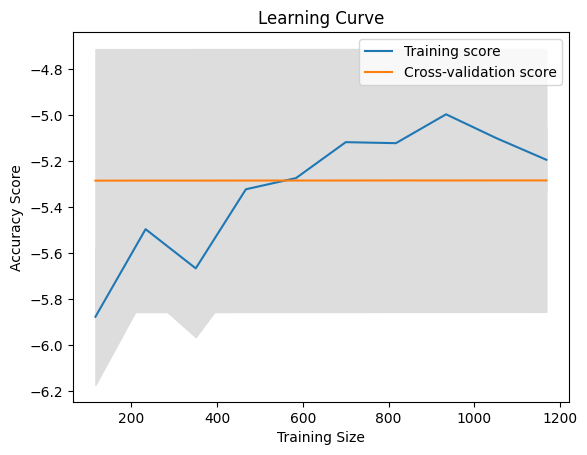

In [35]:
# Crear rangos de tamaños de entrenamiento
train_sizes = np.linspace(0.1, 1.0, 10)

# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model1, X, y, train_sizes=train_sizes, cv=5)

# Calcular las medias y desviaciones estándar de los puntajes de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dibujar las curvas de aprendizaje
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

# Crear la leyenda y los títulos
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()